In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean
from statistics import stdev as SD 
import scipy.stats as st  #package for statistics
import seaborn as sns # package for boxplot, info at https://seaborn.pydata.org/generated/seaborn.boxplot.html


## Read master csv
- This csv file stores the kinetochore positions as a distance from a spindle pole
- C_ refers to the experiment. control and S_ referes to SKAP KO
- Each column in csv is named according this definition: date_cell#_KTpair#. 
- Sister kinetochore pairs denotes by a and b.
- Each row is the measured distance over time (in seconds)

In [2]:
raw_data=pd.read_csv("oscillations_rescues_rpe_Halo_cenpA_FIXED POLE_selected_resc_registered.csv")
print(raw_data)

     Time  ctr_20221111_cell1_kt1a  ctr_20221111_cell1_kt1b  \
0       3                 7.907080                 6.728788   
1       6                 7.970400                 6.741026   
2       9                 7.996016                 6.820871   
3      12                 7.982066                 6.876951   
4      15                 7.948970                 6.989763   
..    ...                      ...                      ...   
130   393                      NaN                      NaN   
131   396                      NaN                      NaN   
132   399                      NaN                      NaN   
133   402                      NaN                      NaN   
134   405                      NaN                      NaN   

     ctr_20221111_cell1_kt2a  ctr_20221111_cell1_kt2b  \
0                   6.359209                 5.054173   
1                   6.303978                 4.969891   
2                   6.352814                 5.003413   
3              

### Control data

In [3]:
compiled_data = pd.DataFrame(columns = ["Experiment", "KT_sister", "Time", "KT_dist"])

for column in raw_data:
    if column.startswith("c"):
        kt_dist=raw_data[column][raw_data[column].notnull()].tolist()
        ctr_kt_names = [column[:-1]] * len(kt_dist)
        ctr_sis_names = [column[-1]] * len(kt_dist)
        time_kt=raw_data["Time"][raw_data[column].notnull()].tolist()
#         print(len(time_kt),len(kt_dist))
        zippedList =  list(zip(ctr_kt_names, ctr_sis_names, time_kt, kt_dist))
        df_temp = pd.DataFrame(zippedList,columns = ["Experiment", "KT_sister", "Time", "KT_dist"])
        compiled_data = pd.concat([compiled_data, df_temp], axis=0, sort=False, ignore_index = True)
compiled_data
print(compiled_data)

                  Experiment KT_sister Time   KT_dist
0     ctr_20221111_cell1_kt1         a    3  7.907080
1     ctr_20221111_cell1_kt1         a    6  7.970400
2     ctr_20221111_cell1_kt1         a    9  7.996016
3     ctr_20221111_cell1_kt1         a   12  7.982066
4     ctr_20221111_cell1_kt1         a   15  7.948970
...                      ...       ...  ...       ...
3329  ctr_20230210_cell9_kt4         b  192  9.062367
3330  ctr_20230210_cell9_kt4         b  195  9.082148
3331  ctr_20230210_cell9_kt4         b  198  9.092689
3332  ctr_20230210_cell9_kt4         b  201  8.957816
3333  ctr_20230210_cell9_kt4         b  204  8.955533

[3334 rows x 4 columns]


### Calculate speed of kinetochore movement at every time point (ctrl)

In [4]:
kt_speed_list=[]
for t in range(0,len(compiled_data.KT_dist)-1):
    kt_speed = (60*(compiled_data.KT_dist[t+1] - compiled_data.KT_dist[t]))/3 #speed calculation from the entire list
#     print(t,kt_speed)
    kt_speed_list.append(kt_speed) #transform the data in a actual phyton list
kt_speed_list.insert(0, np.nan) #insert an empty opsition at the first position (0) of the list

kt_speed=pd.Series(kt_speed_list) #transform the list in to a series (a column like on a table)


# print(type(kt_speed))
# print(kt_speed)

compiled_data["KT_speed"]=kt_speed #add a new column named (KT_speed) with the data kt_speed
compiled_data
print(compiled_data)


                  Experiment KT_sister Time   KT_dist  KT_speed
0     ctr_20221111_cell1_kt1         a    3  7.907080       NaN
1     ctr_20221111_cell1_kt1         a    6  7.970400  1.266384
2     ctr_20221111_cell1_kt1         a    9  7.996016  0.512320
3     ctr_20221111_cell1_kt1         a   12  7.982066 -0.278992
4     ctr_20221111_cell1_kt1         a   15  7.948970 -0.661918
...                      ...       ...  ...       ...       ...
3329  ctr_20230210_cell9_kt4         b  192  9.062367  1.691292
3330  ctr_20230210_cell9_kt4         b  195  9.082148  0.395626
3331  ctr_20230210_cell9_kt4         b  198  9.092689  0.210822
3332  ctr_20230210_cell9_kt4         b  201  8.957816 -2.697461
3333  ctr_20230210_cell9_kt4         b  204  8.955533 -0.045669

[3334 rows x 5 columns]


In [5]:
# remove the first value of each pair at the KT_speed, so it is not calculated using the last value from the previous KT

compiled_data.loc[compiled_data["Time"] == 3, "KT_speed"] = np.nan   #change the first KT_speed value of each kinetochore (time 3 s) to 0
compiled_data

# compiled_data.to_excel ("compiled_data.xlsx")

# obtained from here: https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/

,Experiment,KT_sister,Time,KT_dist,KT_speed
0,ctr_20221111_cell1_kt1,a,3,7.907080,NaN
1,ctr_20221111_cell1_kt1,a,6,7.970400,1.266384
2,ctr_20221111_cell1_kt1,a,9,7.996016,0.512320
3,ctr_20221111_cell1_kt1,a,12,7.982066,-0.278992
4,ctr_20221111_cell1_kt1,a,15,7.948970,-0.661918
...,...,...,...,...,...
3329,ctr_20230210_cell9_kt4,b,192,9.062367,1.691292
3330,ctr_20230210_cell9_kt4,b,195,9.082148,0.395626
3331,ctr_20230210_cell9_kt4,b,198,9.092689,0.210822
3332,ctr_20230210_cell9_kt4,b,201,8.957816,-2.697461


### Calculate the standard deviation of the position of each kinetochore over time (ctrl)

In [6]:
ctr_position_stdev=[]#open this to be able to get a list from the above calculations

for i in compiled_data.Experiment.unique():
    pair = compiled_data[compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_dist']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_dist']
    pair_b = pair_b.reset_index()
 

    
    
    
    stdev_pair_a=pair_a['KT_dist'].std()
    stdev_pair_b=pair_b['KT_dist'].std()
    ctr_position_stdev.append(stdev_pair_a)
    ctr_position_stdev.append(stdev_pair_b)
#     print(stdev_pair_a,stdev_pair_b)

# print(ctr_position_stdev)



### velocity correlation between sister kinetochores within a pair (ctrl)

In [8]:
ctr_velocity_correlation=[]

for i in compiled_data.Experiment.unique():
    pair = compiled_data[compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b


    
    velocity_correlation=pair_a["KT_speed"][1:].corr(pair_b["KT_speed"][1:], method='spearman')
    ctr_velocity_correlation.append(velocity_correlation)


    
# print(ctr_velocity_correlation)
    

### kinetochore speed calculation (ctr)

In [9]:
ctr_kt_speed_mean_abs=[] #open this to be able to get a list from the above calculations



for i in compiled_data.Experiment.unique():
    pair = compiled_data[compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b


#     print(pair_a)
    pair_a_abs=pair_a['KT_speed'][1:].abs()
    pair_b_abs=pair_b['KT_speed'][1:].abs()

    
    kt_a_speed_mean_abs=mean(pair_a_abs) #getting the average speed of each kinetochore (first the a and then the b) 
    kt_b_speed_mean_abs=mean(pair_b_abs)
    ctr_kt_speed_mean_abs.append(kt_a_speed_mean_abs) #add the 2 groups of KT_speed average to the same list, so I can plot it together and also keep and refear to the data once out of the loop
    ctr_kt_speed_mean_abs.append(kt_b_speed_mean_abs)

#     print(kt_a_speed_mean,kt_b_speed_mean)
  

### amount of time sister kinetochore pairs move in opposite directions (ctrl)

In [10]:
ctr_KT_oposite_movement_freq=[]

for i in compiled_data.Experiment.unique():
    pair = compiled_data[compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

    speed_multiplication=pair_a['KT_speed'][1:]*pair_b['KT_speed'][1:] #to get the ooposite ovement as a negative value(+*-=-)
#     print(speed_multiplication)
    number_oposite=sum(n < 0 for n in speed_multiplication)
#     number_oposite=speed_multiplication.lt(0).sum().sum() # complicated option that I do not understand obtained from https://stackoverflow.com/questions/36155942/need-count-of-negative-values-in-a-dataframe
    proportion_oposite_movement=100*number_oposite/len(pair_a["KT_speed"][1:]) #to get the percentage
#     print(number_oposite), print(len(pair_a['KT_speed'])), print(proportion_oposite_movement), print(speed_multiplication)
    ctr_KT_oposite_movement_freq.append(proportion_oposite_movement)
print(ctr_KT_oposite_movement_freq)
    
#     print(test), print(number_oposite)

[27.586206896551722, 18.367346938775512, 23.214285714285715, 22.22222222222222, 22.388059701492537, 8.823529411764707, 25.0, 20.895522388059703, 16.216216216216218, 25.0, 23.076923076923077, 19.82758620689655, 23.893805309734514, 20.54794520547945, 18.181818181818183, 33.333333333333336, 21.05263157894737, 27.692307692307693, 26.31578947368421, 12.857142857142858, 10.344827586206897, 10.447761194029852, 11.940298507462687]


                 Experiment KT_sister Time   KT_dist  KT_speed
0    ctr_20221111_cell1_kt1         a    3  7.907080       NaN
1    ctr_20221111_cell1_kt1         a    6  7.970400  1.266384
2    ctr_20221111_cell1_kt1         a    9  7.996016  0.512320
3    ctr_20221111_cell1_kt1         a   12  7.982066 -0.278992
4    ctr_20221111_cell1_kt1         a   15  7.948970 -0.661918
..                      ...       ...  ...       ...       ...
113  ctr_20221111_cell1_kt1         b  165  5.642436  0.135441
114  ctr_20221111_cell1_kt1         b  168  5.718587  1.523012
115  ctr_20221111_cell1_kt1         b  171  5.806215  1.752559
116  ctr_20221111_cell1_kt1         b  174  5.982527  3.526234
117  ctr_20221111_cell1_kt1         b  177  6.048802  1.325506

[118 rows x 5 columns]


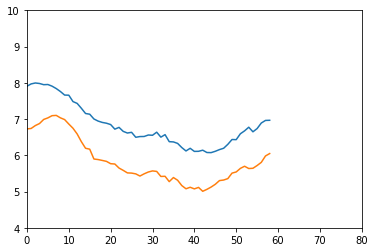

                 Experiment KT_sister Time   KT_dist  KT_speed
118  ctr_20221111_cell1_kt2         a    3  6.359209       NaN
119  ctr_20221111_cell1_kt2         a    6  6.303978 -1.104630
120  ctr_20221111_cell1_kt2         a    9  6.352814  0.976720
121  ctr_20221111_cell1_kt2         a   12  6.320144 -0.653391
122  ctr_20221111_cell1_kt2         a   15  6.263811 -1.126660
..                      ...       ...  ...       ...       ...
213  ctr_20221111_cell1_kt2         b  138  5.042560  2.181394
214  ctr_20221111_cell1_kt2         b  141  5.125904  1.666879
215  ctr_20221111_cell1_kt2         b  144  5.188096  1.243853
216  ctr_20221111_cell1_kt2         b  147  5.236929  0.976658
217  ctr_20221111_cell1_kt2         b  150  5.223636 -0.265861

[100 rows x 5 columns]


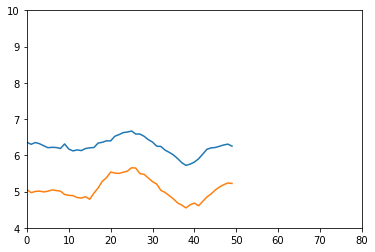

                 Experiment KT_sister Time   KT_dist  KT_speed
218  ctr_20221111_cell2_kt1         a    3  3.488826       NaN
219  ctr_20221111_cell2_kt1         a    6  3.413623 -1.504058
220  ctr_20221111_cell2_kt1         a    9  3.320510 -1.862259
221  ctr_20221111_cell2_kt1         a   12  3.326162  0.113046
222  ctr_20221111_cell2_kt1         a   15  3.456084  2.598437
..                      ...       ...  ...       ...       ...
327  ctr_20221111_cell2_kt1         b  159  5.653507 -0.396340
328  ctr_20221111_cell2_kt1         b  162  5.629565 -0.478857
329  ctr_20221111_cell2_kt1         b  165  5.604483 -0.501625
330  ctr_20221111_cell2_kt1         b  168  5.668048  1.271297
331  ctr_20221111_cell2_kt1         b  171  5.556886 -2.223251

[114 rows x 5 columns]


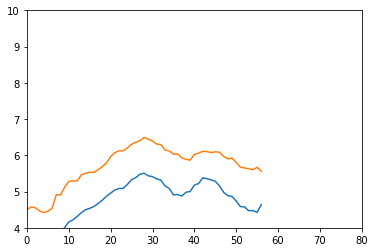

                 Experiment KT_sister Time   KT_dist  KT_speed
332  ctr_20221111_cell2_kt2         a    3  6.036616       NaN
333  ctr_20221111_cell2_kt2         a    6  6.024028 -0.251749
334  ctr_20221111_cell2_kt2         a    9  5.851283 -3.454897
335  ctr_20221111_cell2_kt2         a   12  5.818718 -0.651306
336  ctr_20221111_cell2_kt2         a   15  5.910451  1.834655
..                      ...       ...  ...       ...       ...
437  ctr_20221111_cell2_kt2         b  153  7.109532  0.954483
438  ctr_20221111_cell2_kt2         b  156  7.200099  1.811330
439  ctr_20221111_cell2_kt2         b  159  7.115475 -1.692473
440  ctr_20221111_cell2_kt2         b  162  7.099897 -0.311568
441  ctr_20221111_cell2_kt2         b  165  7.054059 -0.916753

[110 rows x 5 columns]


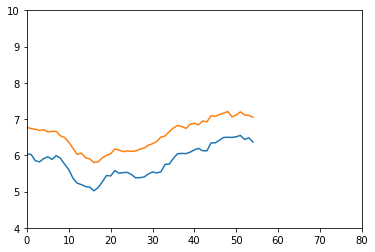

                 Experiment KT_sister Time   KT_dist  KT_speed
442  ctr_20221111_cell6_kt1         a    3  8.249172       NaN
443  ctr_20221111_cell6_kt1         a    6  8.193225 -1.118946
444  ctr_20221111_cell6_kt1         a    9  8.101367 -1.837169
445  ctr_20221111_cell6_kt1         a   12  8.004836 -1.930621
446  ctr_20221111_cell6_kt1         a   15  7.914688 -1.802957
..                      ...       ...  ...       ...       ...
573  ctr_20221111_cell6_kt1         b  192  6.213072  2.299440
574  ctr_20221111_cell6_kt1         b  195  6.261208  0.962717
575  ctr_20221111_cell6_kt1         b  198  6.275441  0.284645
576  ctr_20221111_cell6_kt1         b  201  6.401952  2.530233
577  ctr_20221111_cell6_kt1         b  204  6.476807  1.497101

[136 rows x 5 columns]


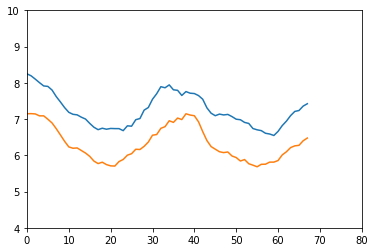

                 Experiment KT_sister Time   KT_dist  KT_speed
578  ctr_20221111_cell6_kt2         a    3  5.844296       NaN
579  ctr_20221111_cell6_kt2         a    6  5.732836 -2.229195
580  ctr_20221111_cell6_kt2         a    9  5.632044 -2.015852
581  ctr_20221111_cell6_kt2         a   12  5.510712 -2.426631
582  ctr_20221111_cell6_kt2         a   15  5.394761 -2.319014
..                      ...       ...  ...       ...       ...
711  ctr_20221111_cell6_kt2         b  195  6.611705  2.851747
712  ctr_20221111_cell6_kt2         b  198  6.690830  1.582515
713  ctr_20221111_cell6_kt2         b  201  6.798203  2.147461
714  ctr_20221111_cell6_kt2         b  204  6.941089  2.857709
715  ctr_20221111_cell6_kt2         b  207  7.079588  2.769989

[138 rows x 5 columns]


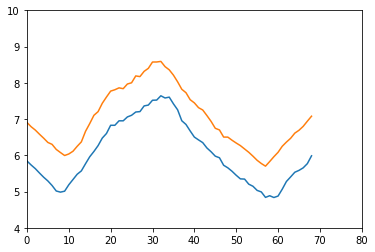

                 Experiment KT_sister Time   KT_dist  KT_speed
716  ctr_20221111_cell6_kt3         a    3  7.122233       NaN
717  ctr_20221111_cell6_kt3         a    6  7.106014 -0.324398
718  ctr_20221111_cell6_kt3         a    9  7.085143 -0.417409
719  ctr_20221111_cell6_kt3         a   12  7.077190 -0.159053
720  ctr_20221111_cell6_kt3         a   15  7.083529  0.126777
..                      ...       ...  ...       ...       ...
849  ctr_20221111_cell6_kt3         b  195  6.663535 -1.150717
850  ctr_20221111_cell6_kt3         b  198  6.564463 -1.981447
851  ctr_20221111_cell6_kt3         b  201  6.428741 -2.714428
852  ctr_20221111_cell6_kt3         b  204  6.264583 -3.283160
853  ctr_20221111_cell6_kt3         b  207  6.085884 -3.573983

[138 rows x 5 columns]


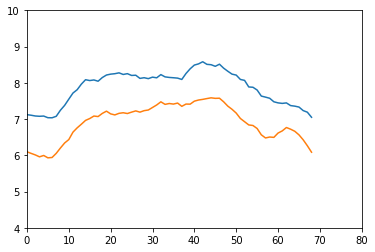

                 Experiment KT_sister Time   KT_dist  KT_speed
854  ctr_20221111_cell6_kt4         a    3  5.619554       NaN
855  ctr_20221111_cell6_kt4         a    6  5.486443 -2.662230
856  ctr_20221111_cell6_kt4         a    9  5.346356 -2.801736
857  ctr_20221111_cell6_kt4         a   12  5.206034 -2.806432
858  ctr_20221111_cell6_kt4         a   15  5.169016 -0.740363
..                      ...       ...  ...       ...       ...
985  ctr_20221111_cell6_kt4         b  192  5.892687 -0.176216
986  ctr_20221111_cell6_kt4         b  195  5.942490  0.996048
987  ctr_20221111_cell6_kt4         b  198  5.800675 -2.836290
988  ctr_20221111_cell6_kt4         b  201  5.713775 -1.738002
989  ctr_20221111_cell6_kt4         b  204  5.631183 -1.651849

[136 rows x 5 columns]


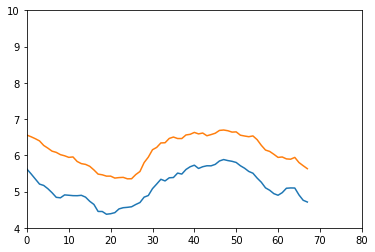

                  Experiment KT_sister Time   KT_dist  KT_speed
990   ctr_20230210_cell1_kt1         a    3  6.727144       NaN
991   ctr_20230210_cell1_kt1         a    6  6.570189 -3.139093
992   ctr_20230210_cell1_kt1         a    9  6.659133  1.778876
993   ctr_20230210_cell1_kt1         a   12  6.642364 -0.335371
994   ctr_20230210_cell1_kt1         a   15  6.678527  0.723261
...                      ...       ...  ...       ...       ...
1135  ctr_20230210_cell1_kt1         b  213  6.944926  2.159601
1136  ctr_20230210_cell1_kt1         b  216  7.128935  3.680169
1137  ctr_20230210_cell1_kt1         b  219  7.261739  2.656086
1138  ctr_20230210_cell1_kt1         b  222  7.239210 -0.450577
1139  ctr_20230210_cell1_kt1         b  225  7.325774  1.731278

[150 rows x 5 columns]


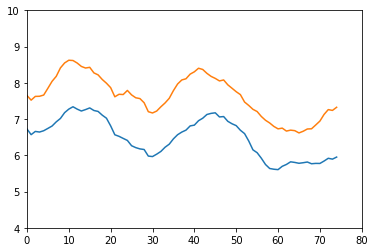

                  Experiment KT_sister Time   KT_dist  KT_speed
1140  ctr_20230210_cell1_kt2         a    3  5.581754       NaN
1141  ctr_20230210_cell1_kt2         a    6  5.551455 -0.605971
1142  ctr_20230210_cell1_kt2         a    9  5.475856 -1.511986
1143  ctr_20230210_cell1_kt2         a   12  5.337979 -2.757540
1144  ctr_20230210_cell1_kt2         a   15  5.276737 -1.224828
...                      ...       ...  ...       ...       ...
1289  ctr_20230210_cell1_kt2         b  219  7.242095 -1.068808
1290  ctr_20230210_cell1_kt2         b  222  7.229153 -0.258840
1291  ctr_20230210_cell1_kt2         b  225  7.309032  1.597594
1292  ctr_20230210_cell1_kt2         b  228  7.279138 -0.597880
1293  ctr_20230210_cell1_kt2         b  231  7.208258 -1.417607

[154 rows x 5 columns]


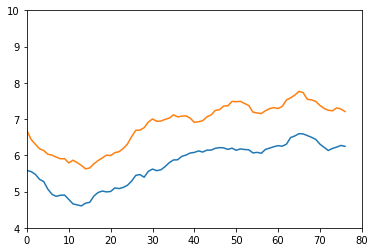

                  Experiment KT_sister Time   KT_dist  KT_speed
1294  ctr_20230210_cell1_kt3         a    3  6.468482       NaN
1295  ctr_20230210_cell1_kt3         a    6  6.545046  1.531268
1296  ctr_20230210_cell1_kt3         a    9  6.647138  2.041845
1297  ctr_20230210_cell1_kt3         a   12  6.686131  0.779867
1298  ctr_20230210_cell1_kt3         a   15  6.728225  0.841861
...                      ...       ...  ...       ...       ...
1421  ctr_20230210_cell1_kt3         b  186  7.064639 -0.432649
1422  ctr_20230210_cell1_kt3         b  189  7.088664  0.480498
1423  ctr_20230210_cell1_kt3         b  192  7.024329 -1.286691
1424  ctr_20230210_cell1_kt3         b  195  6.917014 -2.146300
1425  ctr_20230210_cell1_kt3         b  198  6.979120  1.242125

[132 rows x 5 columns]


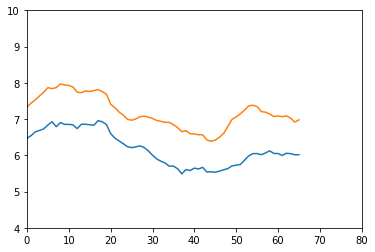

                  Experiment KT_sister Time   KT_dist  KT_speed
1426  ctr_20230210_cell3_kt1         a    3  5.606639       NaN
1427  ctr_20230210_cell3_kt1         a    6  5.740986  2.686934
1428  ctr_20230210_cell3_kt1         a    9  6.070631  6.592901
1429  ctr_20230210_cell3_kt1         a   12  6.242548  3.438350
1430  ctr_20230210_cell3_kt1         a   15  6.483719  4.823424
...                      ...       ...  ...       ...       ...
1655  ctr_20230210_cell3_kt1         b  339  4.864711 -1.403199
1656  ctr_20230210_cell3_kt1         b  342  4.693695 -3.420322
1657  ctr_20230210_cell3_kt1         b  345  4.611995 -1.633994
1658  ctr_20230210_cell3_kt1         b  348  4.531575 -1.608402
1659  ctr_20230210_cell3_kt1         b  351  4.491412 -0.803264

[234 rows x 5 columns]


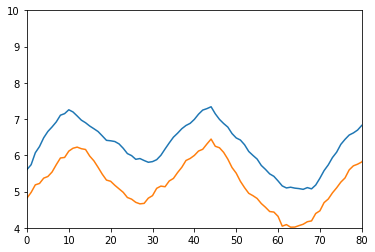

                  Experiment KT_sister Time   KT_dist  KT_speed
1660  ctr_20230210_cell3_kt2         a    3  8.158493       NaN
1661  ctr_20230210_cell3_kt2         a    6  8.139844 -0.372966
1662  ctr_20230210_cell3_kt2         a    9  8.128740 -0.222078
1663  ctr_20230210_cell3_kt2         a   12  8.047752 -1.619771
1664  ctr_20230210_cell3_kt2         a   15  7.977645 -1.402136
...                      ...       ...  ...       ...       ...
1883  ctr_20230210_cell3_kt2         b  330  7.664686  0.571750
1884  ctr_20230210_cell3_kt2         b  333  7.660582 -0.082074
1885  ctr_20230210_cell3_kt2         b  336  7.682386  0.436067
1886  ctr_20230210_cell3_kt2         b  339  7.664491 -0.357889
1887  ctr_20230210_cell3_kt2         b  342  7.708541  0.881002

[228 rows x 5 columns]


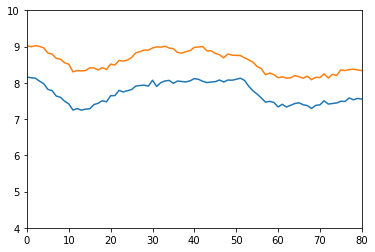

                  Experiment KT_sister Time   KT_dist  KT_speed
1888  ctr_20230210_cell3_kt3         a    3  7.965654       NaN
1889  ctr_20230210_cell3_kt3         a    6  7.857277 -2.167541
1890  ctr_20230210_cell3_kt3         a    9  7.809519 -0.955167
1891  ctr_20230210_cell3_kt3         a   12  7.642286 -3.344654
1892  ctr_20230210_cell3_kt3         a   15  7.485136 -3.143003
...                      ...       ...  ...       ...       ...
2031  ctr_20230210_cell3_kt3         b  210  5.982125  0.930596
2032  ctr_20230210_cell3_kt3         b  213  6.130000  2.957486
2033  ctr_20230210_cell3_kt3         b  216  6.299353  3.387055
2034  ctr_20230210_cell3_kt3         b  219  6.435688  2.726718
2035  ctr_20230210_cell3_kt3         b  222  6.514690  1.580025

[148 rows x 5 columns]


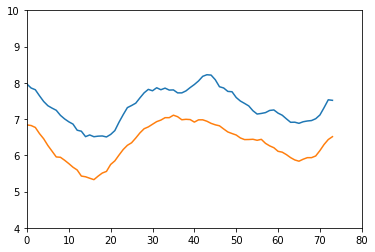

                  Experiment KT_sister Time   KT_dist  KT_speed
2036  ctr_20230210_cell3_kt4         a    3  7.703903       NaN
2037  ctr_20230210_cell3_kt4         a    6  7.813448  2.190909
2038  ctr_20230210_cell3_kt4         a    9  7.759508 -1.078798
2039  ctr_20230210_cell3_kt4         a   12  7.755577 -0.078627
2040  ctr_20230210_cell3_kt4         a   15  7.683039 -1.450752
...                      ...       ...  ...       ...       ...
2165  ctr_20230210_cell3_kt4         b  189  7.274651 -0.937692
2166  ctr_20230210_cell3_kt4         b  192  7.131815 -2.856717
2167  ctr_20230210_cell3_kt4         b  195  6.988354 -2.869205
2168  ctr_20230210_cell3_kt4         b  198  6.905339 -1.660312
2169  ctr_20230210_cell3_kt4         b  201  6.887657 -0.353630

[134 rows x 5 columns]


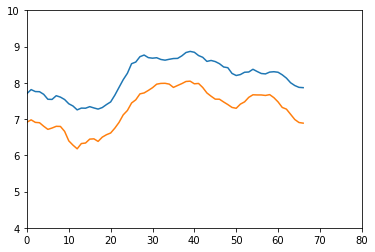

                  Experiment KT_sister Time   KT_dist  KT_speed
2170  ctr_20230210_cell6_kt1         a    3  9.155031       NaN
2171  ctr_20230210_cell6_kt1         a    6  9.297713  2.853634
2172  ctr_20230210_cell6_kt1         a    9  9.483949  3.724715
2173  ctr_20230210_cell6_kt1         a   12  9.597829  2.277606
2174  ctr_20230210_cell6_kt1         a   15  9.611932  0.282061
...                      ...       ...  ...       ...       ...
2299  ctr_20230210_cell6_kt1         b  189  8.446757  2.199440
2300  ctr_20230210_cell6_kt1         b  192  8.377792 -1.379300
2301  ctr_20230210_cell6_kt1         b  195  8.433854  1.121228
2302  ctr_20230210_cell6_kt1         b  198  8.513041  1.583752
2303  ctr_20230210_cell6_kt1         b  201  8.470128 -0.858265

[134 rows x 5 columns]


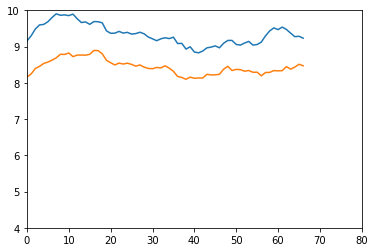

                  Experiment KT_sister Time   KT_dist  KT_speed
2304  ctr_20230210_cell8_kt1         a    3  9.184419       NaN
2305  ctr_20230210_cell8_kt1         a    6  9.205753  0.426697
2306  ctr_20230210_cell8_kt1         a    9  9.141368 -1.287714
2307  ctr_20230210_cell8_kt1         a   12  9.267235  2.517339
2308  ctr_20230210_cell8_kt1         a   15  9.406093  2.777164
...                      ...       ...  ...       ...       ...
2453  ctr_20230210_cell8_kt1         b  219  6.634617  1.214636
2454  ctr_20230210_cell8_kt1         b  222  6.687811  1.063890
2455  ctr_20230210_cell8_kt1         b  225  6.670953 -0.337154
2456  ctr_20230210_cell8_kt1         b  228  6.582802 -1.763032
2457  ctr_20230210_cell8_kt1         b  231  6.480879 -2.038456

[154 rows x 5 columns]


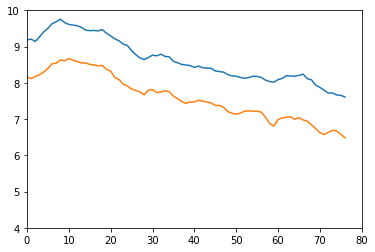

                  Experiment KT_sister Time   KT_dist  KT_speed
2458  ctr_20230210_cell8_kt2         a    3  7.947585       NaN
2459  ctr_20230210_cell8_kt2         a    6  7.860692 -1.737863
2460  ctr_20230210_cell8_kt2         a    9  7.827526 -0.663307
2461  ctr_20230210_cell8_kt2         a   12  7.864046  0.730400
2462  ctr_20230210_cell8_kt2         a   15  7.809043 -1.100077
...                      ...       ...  ...       ...       ...
2585  ctr_20230210_cell8_kt2         b  186  8.939375 -1.845885
2586  ctr_20230210_cell8_kt2         b  189  8.998482  1.182139
2587  ctr_20230210_cell8_kt2         b  192  9.008281  0.195971
2588  ctr_20230210_cell8_kt2         b  195  8.917768 -1.810267
2589  ctr_20230210_cell8_kt2         b  198  8.851550 -1.324342

[132 rows x 5 columns]


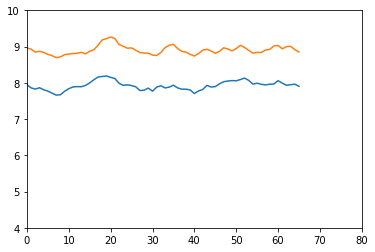

                  Experiment KT_sister Time    KT_dist  KT_speed
2590  ctr_20230210_cell8_kt3         a    3  10.347398       NaN
2591  ctr_20230210_cell8_kt3         a    6  10.228050 -2.386956
2592  ctr_20230210_cell8_kt3         a    9  10.214186 -0.277285
2593  ctr_20230210_cell8_kt3         a   12  10.185780 -0.568127
2594  ctr_20230210_cell8_kt3         a   15  10.134112 -1.033344
...                      ...       ...  ...        ...       ...
2739  ctr_20230210_cell8_kt3         b  219  10.257192 -0.166780
2740  ctr_20230210_cell8_kt3         b  222  10.207074 -1.002360
2741  ctr_20230210_cell8_kt3         b  225  10.221331  0.285136
2742  ctr_20230210_cell8_kt3         b  228  10.223235  0.038086
2743  ctr_20230210_cell8_kt3         b  231  10.217751 -0.109693

[154 rows x 5 columns]


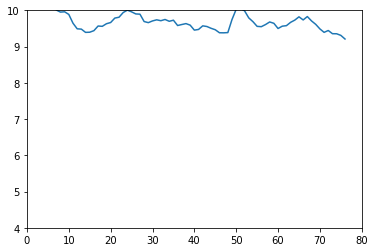

                  Experiment KT_sister Time   KT_dist  KT_speed
2744  ctr_20230210_cell9_kt1         a    3  9.579664       NaN
2745  ctr_20230210_cell9_kt1         a    6  9.509814 -1.396998
2746  ctr_20230210_cell9_kt1         a    9  9.452426 -1.147752
2747  ctr_20230210_cell9_kt1         a   12  9.276491 -3.518705
2748  ctr_20230210_cell9_kt1         a   15  9.242123 -0.687372
...                      ...       ...  ...       ...       ...
2881  ctr_20230210_cell9_kt1         b  201  5.908645  0.035064
2882  ctr_20230210_cell9_kt1         b  204  6.110359  4.034276
2883  ctr_20230210_cell9_kt1         b  207  6.238380  2.560425
2884  ctr_20230210_cell9_kt1         b  210  6.452402  4.280435
2885  ctr_20230210_cell9_kt1         b  213  6.506439  1.080740

[142 rows x 5 columns]


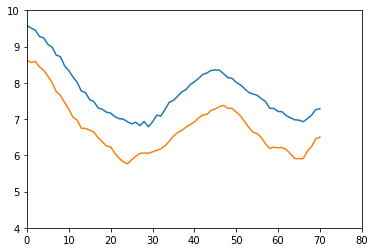

                  Experiment KT_sister Time   KT_dist  KT_speed
2886  ctr_20230210_cell9_kt2         a    3  5.826858       NaN
2887  ctr_20230210_cell9_kt2         a    6  5.643834 -3.660475
2888  ctr_20230210_cell9_kt2         a    9  5.456618 -3.744329
2889  ctr_20230210_cell9_kt2         a   12  5.325947 -2.613419
2890  ctr_20230210_cell9_kt2         a   15  5.253142 -1.456095
...                      ...       ...  ...       ...       ...
3057  ctr_20230210_cell9_kt2         b  252  5.959210  0.480933
3058  ctr_20230210_cell9_kt2         b  255  6.059085  1.997495
3059  ctr_20230210_cell9_kt2         b  258  6.114002  1.098351
3060  ctr_20230210_cell9_kt2         b  261  6.209010  1.900154
3061  ctr_20230210_cell9_kt2         b  264  6.418020  4.180204

[176 rows x 5 columns]


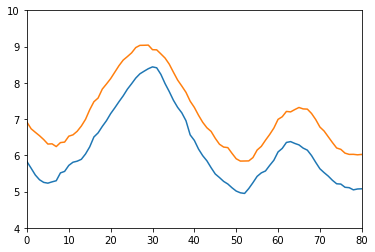

                  Experiment KT_sister Time   KT_dist  KT_speed
3062  ctr_20230210_cell9_kt3         a    3  9.246229       NaN
3063  ctr_20230210_cell9_kt3         a    6  9.334298  1.761380
3064  ctr_20230210_cell9_kt3         a    9  9.271819 -1.249576
3065  ctr_20230210_cell9_kt3         a   12  9.340809  1.379794
3066  ctr_20230210_cell9_kt3         a   15  9.399629  1.176415
...                      ...       ...  ...       ...       ...
3193  ctr_20230210_cell9_kt3         b  192  8.721547  1.698553
3194  ctr_20230210_cell9_kt3         b  195  8.728993  0.148928
3195  ctr_20230210_cell9_kt3         b  198  8.720877 -0.162318
3196  ctr_20230210_cell9_kt3         b  201  8.738975  0.361950
3197  ctr_20230210_cell9_kt3         b  204  8.920738  3.635263

[136 rows x 5 columns]


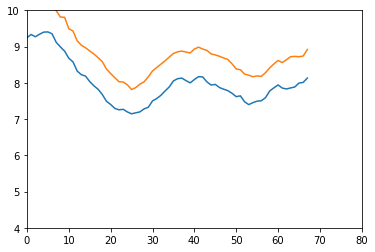

                  Experiment KT_sister Time   KT_dist  KT_speed
3198  ctr_20230210_cell9_kt4         a    3  6.700076       NaN
3199  ctr_20230210_cell9_kt4         a    6  6.746573  0.929945
3200  ctr_20230210_cell9_kt4         a    9  6.861197  2.292478
3201  ctr_20230210_cell9_kt4         a   12  7.017933  3.134712
3202  ctr_20230210_cell9_kt4         a   15  7.144480  2.530936
...                      ...       ...  ...       ...       ...
3329  ctr_20230210_cell9_kt4         b  192  9.062367  1.691292
3330  ctr_20230210_cell9_kt4         b  195  9.082148  0.395626
3331  ctr_20230210_cell9_kt4         b  198  9.092689  0.210822
3332  ctr_20230210_cell9_kt4         b  201  8.957816 -2.697461
3333  ctr_20230210_cell9_kt4         b  204  8.955533 -0.045669

[136 rows x 5 columns]


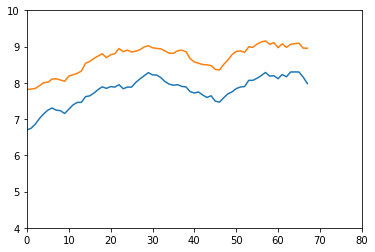

In [11]:
for i in compiled_data.Experiment.unique():
    pair = compiled_data[compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_dist']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_dist']
    pair_b = pair_b.reset_index()
    compiled_data.at[pair_a.index[0], 'KT_dist'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    compiled_data.at[pair_b.index[0], 'KT_dist'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

    print(pair)
    plt.plot(pair_a['KT_dist'])
    plt.plot(pair_b['KT_dist'])
    plt.xlim([0,80])
    plt.ylim([4,10])
    plt.show()
    
    

### SKAP KD experiments

In [12]:
SKAP_compiled_data = pd.DataFrame(columns = ["Experiment", "KT_sister", "Time", "KT_dist"])



for column in raw_data:
    if column.startswith("s"):
        kt_dist=raw_data[column][raw_data[column].notnull()].tolist()
        SKAP_kt_names = [column[:-1]] * len(kt_dist)
        SKAP_sis_names = [column[-1]] * len(kt_dist)
        time_kt=raw_data["Time"][raw_data[column].notnull()].tolist()
#         print(len(time_kt),len(kt_dist))
        zippedList =  list(zip(SKAP_kt_names, SKAP_sis_names, time_kt, kt_dist))
        df_temp = pd.DataFrame(zippedList,columns = ["Experiment", "KT_sister", "Time", "KT_dist"])
        SKAP_compiled_data = pd.concat([SKAP_compiled_data, df_temp], axis=0, sort=False, ignore_index = True)
SKAP_compiled_data

,Experiment,KT_sister,Time,KT_dist
0,siSKAP_20221118_cell1_kt1,a,3,6.264802
1,siSKAP_20221118_cell1_kt1,a,6,6.266306
2,siSKAP_20221118_cell1_kt1,a,9,6.176163
3,siSKAP_20221118_cell1_kt1,a,12,6.196156
4,siSKAP_20221118_cell1_kt1,a,15,6.249580
...,...,...,...,...
3673,siSKAP_20230420_cell1_kt2,b,231,4.077519
3674,siSKAP_20230420_cell1_kt2,b,234,4.129940
3675,siSKAP_20230420_cell1_kt2,b,237,4.062900
3676,siSKAP_20230420_cell1_kt2,b,240,4.095935


### Calculate speed of kinetochore movement at every time point (SKAP KD)

In [13]:
SKAP_kt_speed_list=[]
for t in range(0,len(SKAP_compiled_data.KT_dist)-1):
    SKAP_kt_speed = (60*(SKAP_compiled_data.KT_dist[t+1] - SKAP_compiled_data.KT_dist[t]))/3 #speed calculation from the entire list
#     print(t,kt_speed)
    SKAP_kt_speed_list.append(SKAP_kt_speed) #transform the data in a actual phyton list
SKAP_kt_speed_list.insert(0, np.nan) #insert an empty opsition at the first position (0) of the list

SKAP_kt_speed=pd.Series(SKAP_kt_speed_list) #transform the list in to a series (a column like on a table)


SKAP_compiled_data["KT_speed"]=SKAP_kt_speed #add a new column named (KT_speed) with the data kt_speed
SKAP_compiled_data



,Experiment,KT_sister,Time,KT_dist,KT_speed
0,siSKAP_20221118_cell1_kt1,a,3,6.264802,NaN
1,siSKAP_20221118_cell1_kt1,a,6,6.266306,0.030084
2,siSKAP_20221118_cell1_kt1,a,9,6.176163,-1.802859
3,siSKAP_20221118_cell1_kt1,a,12,6.196156,0.399859
4,siSKAP_20221118_cell1_kt1,a,15,6.249580,1.068480
...,...,...,...,...,...
3673,siSKAP_20230420_cell1_kt2,b,231,4.077519,0.189758
3674,siSKAP_20230420_cell1_kt2,b,234,4.129940,1.048412
3675,siSKAP_20230420_cell1_kt2,b,237,4.062900,-1.340807
3676,siSKAP_20230420_cell1_kt2,b,240,4.095935,0.660700


In [14]:
# remove the first value of each pair at the KT_speed, so it is not calculated using the last value from the previous KT

SKAP_compiled_data.loc[SKAP_compiled_data["Time"] == 3, "KT_speed"] = np.nan   #change the first KT_speed value of each kinetochore (time 3 s) to 0
SKAP_compiled_data

# compiled_data.to_excel ("compiled_data.xlsx")


,Experiment,KT_sister,Time,KT_dist,KT_speed
0,siSKAP_20221118_cell1_kt1,a,3,6.264802,NaN
1,siSKAP_20221118_cell1_kt1,a,6,6.266306,0.030084
2,siSKAP_20221118_cell1_kt1,a,9,6.176163,-1.802859
3,siSKAP_20221118_cell1_kt1,a,12,6.196156,0.399859
4,siSKAP_20221118_cell1_kt1,a,15,6.249580,1.068480
...,...,...,...,...,...
3673,siSKAP_20230420_cell1_kt2,b,231,4.077519,0.189758
3674,siSKAP_20230420_cell1_kt2,b,234,4.129940,1.048412
3675,siSKAP_20230420_cell1_kt2,b,237,4.062900,-1.340807
3676,siSKAP_20230420_cell1_kt2,b,240,4.095935,0.660700


### Calculate the standard deviation of the position of each kinetochore over time (SKAP KD)

In [15]:
SKAP_position_stdev=[]#open this to be able to get a list from the above calculations

for i in SKAP_compiled_data.Experiment.unique():
    pair = SKAP_compiled_data[SKAP_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_dist']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_dist']
    pair_b = pair_b.reset_index()

   
      
    SKAP_stdev_pair_a=pair_a['KT_dist'][1:].std()
    SKAP_stdev_pair_b=pair_b['KT_dist'][1:].std()
    SKAP_position_stdev.append(SKAP_stdev_pair_a)
    SKAP_position_stdev.append(SKAP_stdev_pair_b)
#     print(stdev_pair_a,stdev_pair_b)

print(SKAP_position_stdev)



[0.43039775255873064, 0.44907383670105416, 0.2292945421568939, 0.13305288402503787, 0.2675643492381977, 0.21494474395698895, 0.3300437269169851, 0.3480851522047112, 0.3139763846205727, 0.320040918458466, 0.3813077964400544, 0.4256937820061235, 0.9480403668273035, 1.015715293333733, 0.42228850365867016, 0.37041439199955056, 0.13051213713502569, 0.16502164671297415, 0.3934249323395402, 0.4371469526399209, 0.3759134663513293, 0.46306233657777524, 0.4508774003052915, 0.43924182486777047, 0.3795672306178482, 0.2843858204564785, 0.6372384334904633, 0.6151896128543681, 0.5399084173147611, 0.45225297176985096, 0.36751441085085085, 0.3138829879915253, 0.3964478325559385, 0.34256814370297745, 0.1491885830364976, 0.17021946656446327, 0.2390596903822329, 0.18702676457118161, 0.2858649848546577, 0.24325723148962905, 0.18919584570301085, 0.2015472429191427, 0.3819116416242837, 0.3386384379538036, 0.27740232276664334, 0.22867172031743982, 0.178347897270195, 0.17850746244658636, 0.1696644579701468, 0.

### velocity correlation between sister kinetochores within a pair (SKAP KD)

In [17]:
SKAP_velocity_correlation=[]

for i in SKAP_compiled_data.Experiment.unique():
    pair = SKAP_compiled_data[SKAP_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    SKAP_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    SKAP_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b


    
    velocity_correlation=pair_a["KT_speed"][1:].corr(pair_b["KT_speed"][1:], method='spearman')
    SKAP_velocity_correlation.append(velocity_correlation)

    

### kinetochore speed calculation (SKAP KD)

In [18]:
SKAP_kt_speed_mean_abs=[] #open this to be able to get a list from the above calculations


for i in SKAP_compiled_data.Experiment.unique():
    pair = SKAP_compiled_data[SKAP_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    SKAP_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    SKAP_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

#     print(pair_a)
    pair_a_abs=pair_a['KT_speed'][1:].abs()
    pair_b_abs=pair_b['KT_speed'][1:].abs()
#     print(pair_a)
    
    SKAP_kt_a_speed_mean_abs=mean(pair_a_abs) #getting the average speed of each kinetochore (first the a and then the b) 
    SKAP_kt_b_speed_mean_abs=mean(pair_b_abs)
    SKAP_kt_speed_mean_abs.append(SKAP_kt_a_speed_mean_abs) #add the 2 groups of KT_speed average to the same list, so I can plot it together and also keep and refear to the data once out of the loop
    SKAP_kt_speed_mean_abs.append(SKAP_kt_b_speed_mean_abs)

#     print(kt_a_speed_mean,kt_b_speed_mean)
 

### amount of time sister kinetochore pairs move in opposite directions (SKAP KD)

In [19]:
SKAP_KT_oposite_movement_freq=[]

for i in SKAP_compiled_data.Experiment.unique():
    pair = SKAP_compiled_data[SKAP_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    SKAP_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    SKAP_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

    SKAP_speed_multiplication=pair_a['KT_speed'][1:]*pair_b['KT_speed'][1:] #to get the ooposite ovement as a negative value(+*-=-)
#     print(SKAP_speed_multiplication)
    SKAP_number_oposite=sum(n < 0 for n in SKAP_speed_multiplication)
#     SKAP_number_oposite=SKAP_speed_multiplication.lt(0).sum().sum() # complicated option that I do not understand obtained from https://stackoverflow.com/questions/36155942/need-count-of-negative-values-in-a-dataframe

    SKAP_proportion_oposite_movement=100*SKAP_number_oposite/len(pair_a["KT_speed"][1:]) #to get the percentage
#     print(SKAP_number_oposite), print(len(pair_a['KT_speed'])), print(SKAP_proportion_oposite_movement), print(SKAP_speed_multiplication)
    SKAP_KT_oposite_movement_freq.append(SKAP_proportion_oposite_movement)
print(SKAP_KT_oposite_movement_freq)


[25.0, 25.0, 31.147540983606557, 26.153846153846153, 31.818181818181817, 22.033898305084747, 21.333333333333332, 37.89473684210526, 40.74074074074074, 20.987654320987655, 17.91044776119403, 21.62162162162162, 43.75, 23.75, 18.75, 23.75, 26.25, 21.25, 24.285714285714285, 15.714285714285714, 20.3125, 21.428571428571427, 19.51219512195122, 43.83561643835616, 38.75]


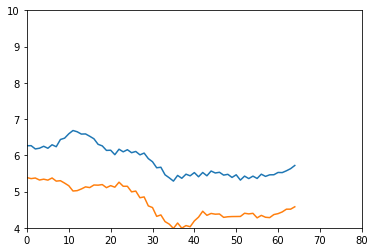

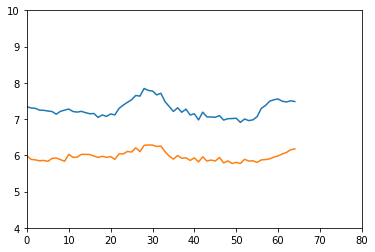

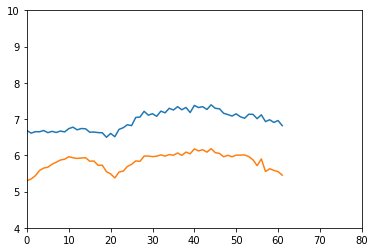

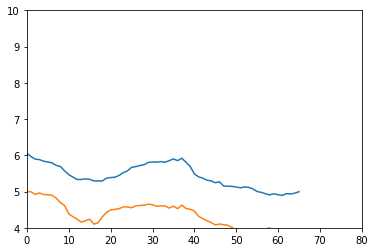

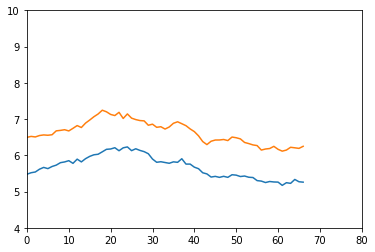

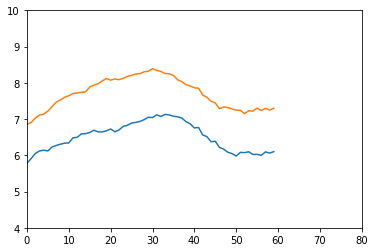

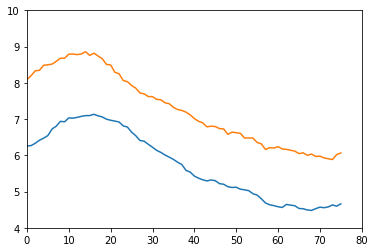

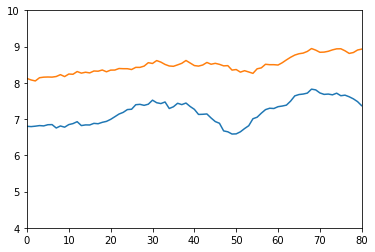

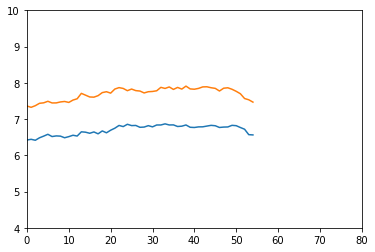

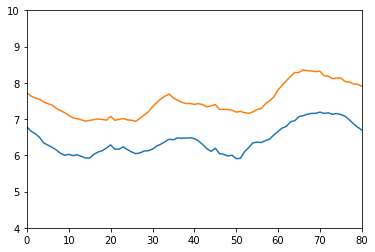

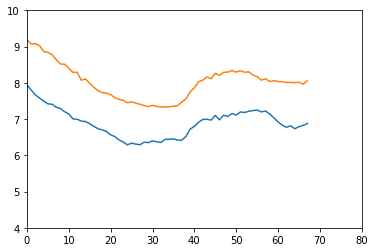

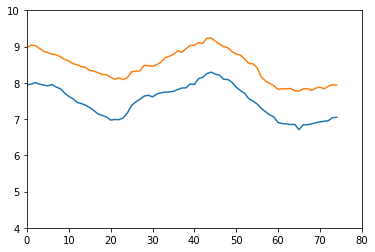

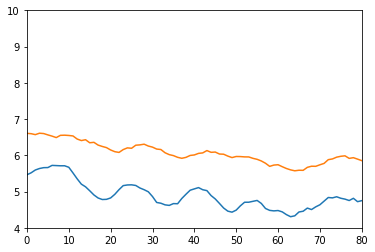

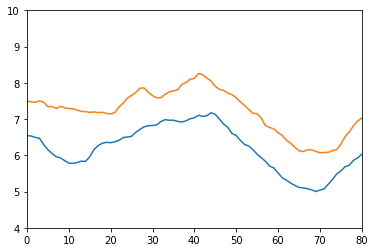

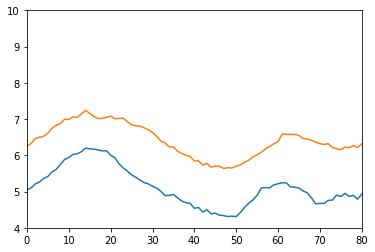

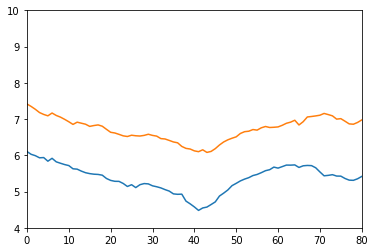

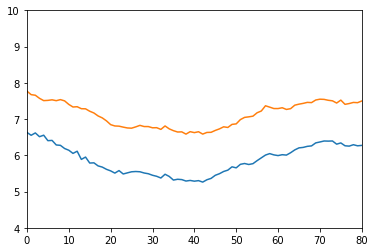

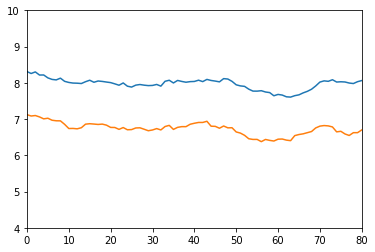

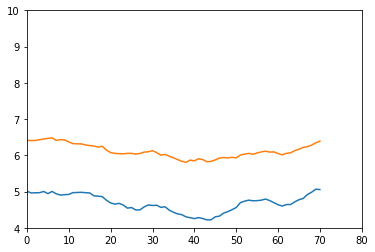

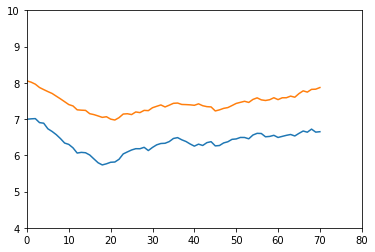

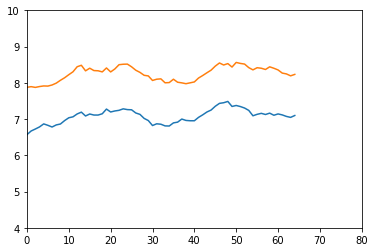

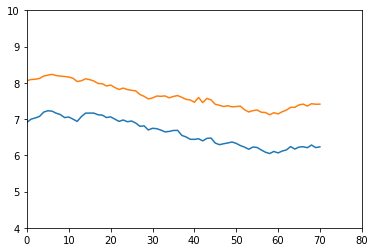

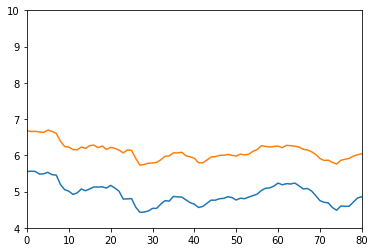

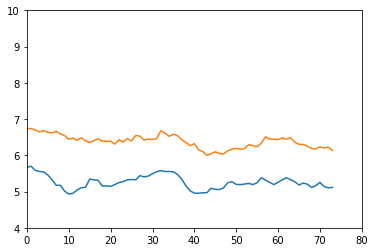

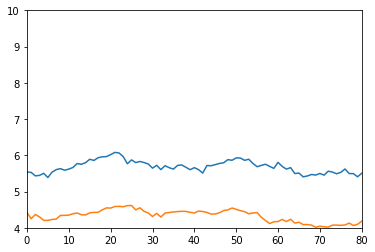

In [20]:
for i in SKAP_compiled_data.Experiment.unique():
    pair = SKAP_compiled_data[SKAP_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_dist']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_dist']
    pair_b = pair_b.reset_index()
    SKAP_compiled_data.at[pair_a.index[0], 'KT_dist'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    SKAP_compiled_data.at[pair_b.index[0], 'KT_dist'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

    plt.plot(pair_a['KT_dist'])
    plt.plot(pair_b['KT_dist'])
    plt.xlim([0,80])
    plt.ylim([4,10])
    plt.show()
    

### SKAP_WT overexpression

In [21]:
WTSKAP_compiled_data = pd.DataFrame(columns = ["Experiment", "KT_sister", "Time", "KT_dist"])



for column in raw_data:
    if column.startswith("W"):
        kt_dist=raw_data[column][raw_data[column].notnull()].tolist()
        WTSKAP_kt_names = [column[:-1]] * len(kt_dist)
        WTSKAP_sis_names = [column[-1]] * len(kt_dist)
        time_kt=raw_data["Time"][raw_data[column].notnull()].tolist()
#         print(len(time_kt),len(kt_dist))
        zippedList =  list(zip(WTSKAP_kt_names, WTSKAP_sis_names, time_kt, kt_dist))
        df_temp = pd.DataFrame(zippedList,columns = ["Experiment", "KT_sister", "Time", "KT_dist"])
        WTSKAP_compiled_data = pd.concat([WTSKAP_compiled_data, df_temp], axis=0, sort=False, ignore_index = True)
WTSKAP_compiled_data

,Experiment,KT_sister,Time,KT_dist
0,WTSKAP_overexp_20230331_plate1_cell3_kt1,a,3,7.066878
1,WTSKAP_overexp_20230331_plate1_cell3_kt1,a,6,6.970546
2,WTSKAP_overexp_20230331_plate1_cell3_kt1,a,9,6.908260
3,WTSKAP_overexp_20230331_plate1_cell3_kt1,a,12,6.798235
4,WTSKAP_overexp_20230331_plate1_cell3_kt1,a,15,6.856732
...,...,...,...,...
2841,WTSKAP_overexp_20230816_cell04_kt2,b,246,4.196927
2842,WTSKAP_overexp_20230816_cell04_kt2,b,249,4.114958
2843,WTSKAP_overexp_20230816_cell04_kt2,b,252,4.068603
2844,WTSKAP_overexp_20230816_cell04_kt2,b,255,4.073519


### Calculate speed of kinetochore movement at every time point (WT_SKAP_overexp)

In [22]:
WTSKAP_kt_speed_list=[]
for t in range(0,len(WTSKAP_compiled_data.KT_dist)-1):
    WTSKAP_kt_speed = (60*(WTSKAP_compiled_data.KT_dist[t+1] - WTSKAP_compiled_data.KT_dist[t]))/3 #speed calculation from the entire list
#     print(t,kt_speed)
    WTSKAP_kt_speed_list.append(WTSKAP_kt_speed) #transform the data in a actual phyton list
WTSKAP_kt_speed_list.insert(0, np.nan) #insert an empty opsition at the first position (0) of the list

WTSKAP_kt_speed=pd.Series(WTSKAP_kt_speed_list) #transform the list in to a series (a column like on a table)


WTSKAP_compiled_data["KT_speed"]=WTSKAP_kt_speed #add a new column named (KT_speed) with the data kt_speed
WTSKAP_compiled_data



,Experiment,KT_sister,Time,KT_dist,KT_speed
0,WTSKAP_overexp_20230331_plate1_cell3_kt1,a,3,7.066878,NaN
1,WTSKAP_overexp_20230331_plate1_cell3_kt1,a,6,6.970546,-1.926628
2,WTSKAP_overexp_20230331_plate1_cell3_kt1,a,9,6.908260,-1.245733
3,WTSKAP_overexp_20230331_plate1_cell3_kt1,a,12,6.798235,-2.200494
4,WTSKAP_overexp_20230331_plate1_cell3_kt1,a,15,6.856732,1.169943
...,...,...,...,...,...
2841,WTSKAP_overexp_20230816_cell04_kt2,b,246,4.196927,1.357360
2842,WTSKAP_overexp_20230816_cell04_kt2,b,249,4.114958,-1.639371
2843,WTSKAP_overexp_20230816_cell04_kt2,b,252,4.068603,-0.927095
2844,WTSKAP_overexp_20230816_cell04_kt2,b,255,4.073519,0.098323


In [23]:
# remove the first value of each pair at the KT_speed, so it is not calculated using the last value from the previous KT

WTSKAP_compiled_data.loc[WTSKAP_compiled_data["Time"] == 3, "KT_speed"] = np.nan   #change the first KT_speed value of each kinetochore (time 3 s) to 0
WTSKAP_compiled_data

# compiled_data.to_excel ("compiled_data.xlsx")


,Experiment,KT_sister,Time,KT_dist,KT_speed
0,WTSKAP_overexp_20230331_plate1_cell3_kt1,a,3,7.066878,NaN
1,WTSKAP_overexp_20230331_plate1_cell3_kt1,a,6,6.970546,-1.926628
2,WTSKAP_overexp_20230331_plate1_cell3_kt1,a,9,6.908260,-1.245733
3,WTSKAP_overexp_20230331_plate1_cell3_kt1,a,12,6.798235,-2.200494
4,WTSKAP_overexp_20230331_plate1_cell3_kt1,a,15,6.856732,1.169943
...,...,...,...,...,...
2841,WTSKAP_overexp_20230816_cell04_kt2,b,246,4.196927,1.357360
2842,WTSKAP_overexp_20230816_cell04_kt2,b,249,4.114958,-1.639371
2843,WTSKAP_overexp_20230816_cell04_kt2,b,252,4.068603,-0.927095
2844,WTSKAP_overexp_20230816_cell04_kt2,b,255,4.073519,0.098323


### Calculate the standard deviation of the position of each kinetochore over time (WT_SKAP overexp)

In [24]:
WTSKAP_position_stdev=[]#open this to be able to get a list from the above calculations

for i in WTSKAP_compiled_data.Experiment.unique():
    pair = WTSKAP_compiled_data[WTSKAP_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_dist']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_dist']
    pair_b = pair_b.reset_index()

   
      
    WTSKAP_stdev_pair_a=pair_a['KT_dist'][1:].std()
    WTSKAP_stdev_pair_b=pair_b['KT_dist'][1:].std()
    WTSKAP_position_stdev.append(WTSKAP_stdev_pair_a)
    WTSKAP_position_stdev.append(WTSKAP_stdev_pair_b)
#     print(stdev_pair_a,stdev_pair_b)

# print(WTSKAP_position_stdev)



### velocity correlation between sister kinetochores within a pair (WT_SKAP overexp)

In [26]:
WTSKAP_velocity_correlation=[]

for i in WTSKAP_compiled_data.Experiment.unique():
    pair = WTSKAP_compiled_data[WTSKAP_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    WTSKAP_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    WTSKAP_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b


    
    velocity_correlation=pair_a["KT_speed"][1:].corr(pair_b["KT_speed"][1:], method='spearman')
    WTSKAP_velocity_correlation.append(velocity_correlation)

    

### kinetochore speed calculation (WT_SKAP overexp)

In [27]:
WTSKAP_kt_speed_mean_abs=[] #open this to be able to get a list from the above calculations


for i in WTSKAP_compiled_data.Experiment.unique():
    pair = WTSKAP_compiled_data[WTSKAP_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    WTSKAP_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    WTSKAP_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

#     print(pair_a)
    pair_a_abs=pair_a['KT_speed'][1:].abs()
    pair_b_abs=pair_b['KT_speed'][1:].abs()
#     print(pair_a)
    
    WTSKAP_kt_a_speed_mean_abs=mean(pair_a_abs) #getting the average speed of each kinetochore (first the a and then the b) 
    WTSKAP_kt_b_speed_mean_abs=mean(pair_b_abs)
    WTSKAP_kt_speed_mean_abs.append(WTSKAP_kt_a_speed_mean_abs) #add the 2 groups of KT_speed average to the same list, so I can plot it together and also keep and refear to the data once out of the loop
    WTSKAP_kt_speed_mean_abs.append(WTSKAP_kt_b_speed_mean_abs)

#     print(kt_a_speed_mean,kt_b_speed_mean)
 

### amount of time sister kinetochore pairs move in opposite directions (WT_SKAP overexp)

In [28]:
WTSKAP_KT_oposite_movement_freq=[]

for i in WTSKAP_compiled_data.Experiment.unique():
    pair = WTSKAP_compiled_data[WTSKAP_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    WTSKAP_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    WTSKAP_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

    WTSKAP_speed_multiplication=pair_a['KT_speed'][1:]*pair_b['KT_speed'][1:] #to get the ooposite ovement as a negative value(+*-=-)
#     print(SKAP_speed_multiplication)
    WTSKAP_number_oposite=sum(n < 0 for n in WTSKAP_speed_multiplication)
#     WTSKAP_number_oposite=WTSKAP_speed_multiplication.lt(0).sum().sum() # complicated option that I do not understand obtained from https://stackoverflow.com/questions/36155942/need-count-of-negative-values-in-a-dataframe

    WTSKAP_proportion_oposite_movement=100*WTSKAP_number_oposite/len(pair_a["KT_speed"][1:]) #to get the percentage
#     print(WTSKAP_number_oposite), print(len(pair_a['KT_speed'])), print(WTSKAP_proportion_oposite_movement), print(WTSKAP_speed_multiplication)
    WTSKAP_KT_oposite_movement_freq.append(WTSKAP_proportion_oposite_movement)
print(WTSKAP_KT_oposite_movement_freq)


[14.736842105263158, 32.63157894736842, 23.25581395348837, 29.850746268656717, 19.718309859154928, 20.689655172413794, 29.62962962962963, 28.571428571428573, 31.25, 24.324324324324323, 33.333333333333336, 15.384615384615385, 9.836065573770492, 25.0, 30.864197530864196, 28.35820895522388, 18.181818181818183, 22.07792207792208, 35.294117647058826]


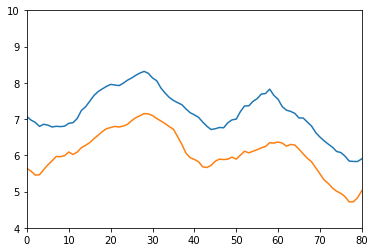

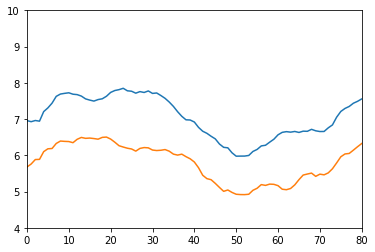

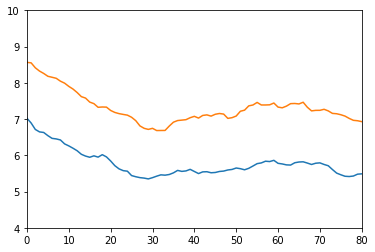

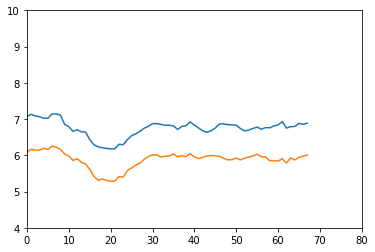

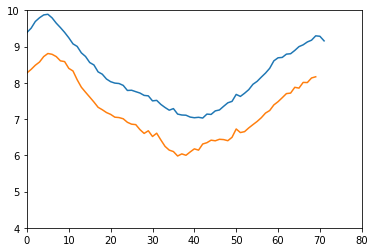

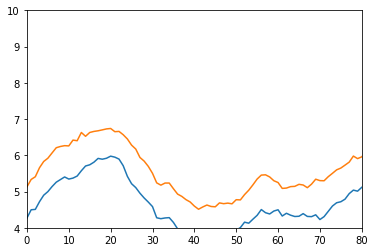

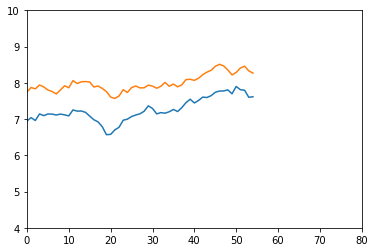

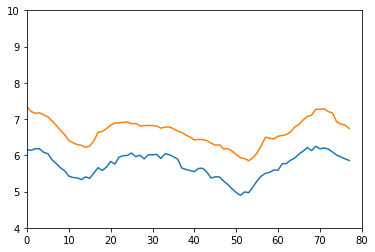

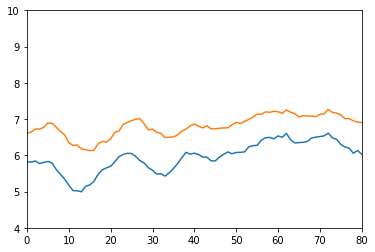

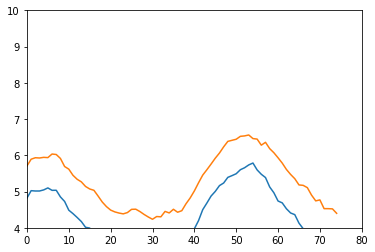

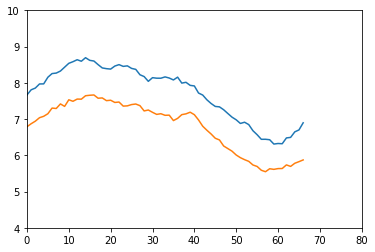

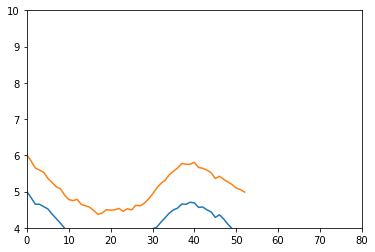

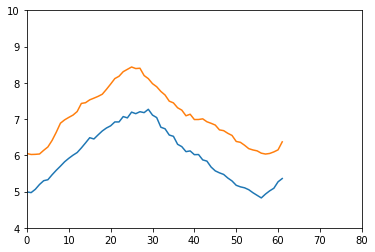

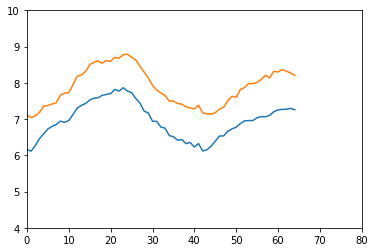

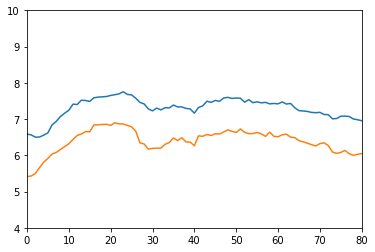

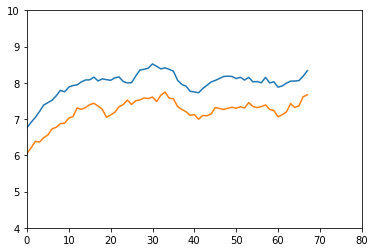

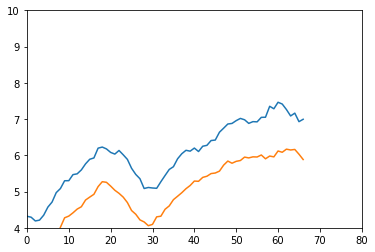

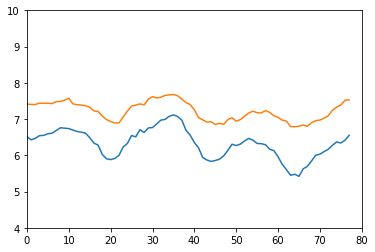

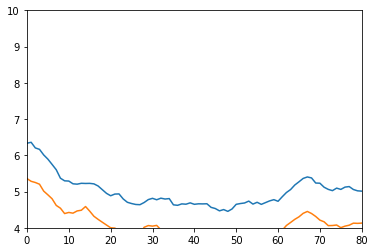

In [29]:
for i in WTSKAP_compiled_data.Experiment.unique():
    pair = WTSKAP_compiled_data[WTSKAP_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_dist']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_dist']
    pair_b = pair_b.reset_index()
    WTSKAP_compiled_data.at[pair_a.index[0], 'KT_dist'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    WTSKAP_compiled_data.at[pair_b.index[0], 'KT_dist'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

    plt.plot(pair_a['KT_dist'])
    plt.plot(pair_b['KT_dist'])
    plt.xlim([0,80])
    plt.ylim([4,10])
    plt.show()
    

### SKAP_deltaMTBD overexpression

In [30]:
deltaMTBD_compiled_data = pd.DataFrame(columns = ["Experiment", "KT_sister", "Time", "KT_dist"])



for column in raw_data:
    if column.startswith("d"):
        kt_dist=raw_data[column][raw_data[column].notnull()].tolist()
        deltaMTBD_kt_names = [column[:-1]] * len(kt_dist)
        deltaMTBD_sis_names = [column[-1]] * len(kt_dist)
        time_kt=raw_data["Time"][raw_data[column].notnull()].tolist()
#         print(len(time_kt),len(kt_dist))
        zippedList =  list(zip(deltaMTBD_kt_names, deltaMTBD_sis_names, time_kt, kt_dist))
        df_temp = pd.DataFrame(zippedList,columns = ["Experiment", "KT_sister", "Time", "KT_dist"])
        deltaMTBD_compiled_data = pd.concat([deltaMTBD_compiled_data, df_temp], axis=0, sort=False, ignore_index = True)
deltaMTBD_compiled_data

,Experiment,KT_sister,Time,KT_dist
0,deltaMTBD_overexp_20230412_1.5mlVirus_cell04_kt1,a,3,8.590898
1,deltaMTBD_overexp_20230412_1.5mlVirus_cell04_kt1,a,6,8.520991
2,deltaMTBD_overexp_20230412_1.5mlVirus_cell04_kt1,a,9,8.455829
3,deltaMTBD_overexp_20230412_1.5mlVirus_cell04_kt1,a,12,8.414807
4,deltaMTBD_overexp_20230412_1.5mlVirus_cell04_kt1,a,15,8.352563
...,...,...,...,...
1619,deltaMTBD_overexp_20230623_1.5mlVirus_cell01_kt1,b,174,6.605099
1620,deltaMTBD_overexp_20230623_1.5mlVirus_cell01_kt1,b,177,6.671157
1621,deltaMTBD_overexp_20230623_1.5mlVirus_cell01_kt1,b,180,6.628001
1622,deltaMTBD_overexp_20230623_1.5mlVirus_cell01_kt1,b,183,6.723713


### Calculate speed of kinetochore movement at every time point (deltaMTBD_SKAP_overexpression)

In [31]:
deltaMTBD_kt_speed_list=[]
for t in range(0,len(deltaMTBD_compiled_data.KT_dist)-1):
    deltaMTBD_kt_speed = (60*(deltaMTBD_compiled_data.KT_dist[t+1] - deltaMTBD_compiled_data.KT_dist[t]))/3 #speed calculation from the entire list
#     print(t,kt_speed)
    deltaMTBD_kt_speed_list.append(deltaMTBD_kt_speed) #transform the data in a actual phyton list
deltaMTBD_kt_speed_list.insert(0, np.nan) #insert an empty opsition at the first position (0) of the list

deltaMTBD_kt_speed=pd.Series(deltaMTBD_kt_speed_list) #transform the list in to a series (a column like on a table)


deltaMTBD_compiled_data["KT_speed"]=deltaMTBD_kt_speed #add a new column named (KT_speed) with the data kt_speed
deltaMTBD_compiled_data



,Experiment,KT_sister,Time,KT_dist,KT_speed
0,deltaMTBD_overexp_20230412_1.5mlVirus_cell04_kt1,a,3,8.590898,NaN
1,deltaMTBD_overexp_20230412_1.5mlVirus_cell04_kt1,a,6,8.520991,-1.398140
2,deltaMTBD_overexp_20230412_1.5mlVirus_cell04_kt1,a,9,8.455829,-1.303236
3,deltaMTBD_overexp_20230412_1.5mlVirus_cell04_kt1,a,12,8.414807,-0.820441
4,deltaMTBD_overexp_20230412_1.5mlVirus_cell04_kt1,a,15,8.352563,-1.244889
...,...,...,...,...,...
1619,deltaMTBD_overexp_20230623_1.5mlVirus_cell01_kt1,b,174,6.605099,-1.652439
1620,deltaMTBD_overexp_20230623_1.5mlVirus_cell01_kt1,b,177,6.671157,1.321156
1621,deltaMTBD_overexp_20230623_1.5mlVirus_cell01_kt1,b,180,6.628001,-0.863107
1622,deltaMTBD_overexp_20230623_1.5mlVirus_cell01_kt1,b,183,6.723713,1.914243


In [32]:
# remove the first value of each pair at the KT_speed, so it is not calculated using the last value from the previous KT

deltaMTBD_compiled_data.loc[deltaMTBD_compiled_data["Time"] == 3, "KT_speed"] = np.nan   #change the first KT_speed value of each kinetochore (time 3 s) to 0
deltaMTBD_compiled_data

# compiled_data.to_excel ("compiled_data.xlsx")


,Experiment,KT_sister,Time,KT_dist,KT_speed
0,deltaMTBD_overexp_20230412_1.5mlVirus_cell04_kt1,a,3,8.590898,NaN
1,deltaMTBD_overexp_20230412_1.5mlVirus_cell04_kt1,a,6,8.520991,-1.398140
2,deltaMTBD_overexp_20230412_1.5mlVirus_cell04_kt1,a,9,8.455829,-1.303236
3,deltaMTBD_overexp_20230412_1.5mlVirus_cell04_kt1,a,12,8.414807,-0.820441
4,deltaMTBD_overexp_20230412_1.5mlVirus_cell04_kt1,a,15,8.352563,-1.244889
...,...,...,...,...,...
1619,deltaMTBD_overexp_20230623_1.5mlVirus_cell01_kt1,b,174,6.605099,-1.652439
1620,deltaMTBD_overexp_20230623_1.5mlVirus_cell01_kt1,b,177,6.671157,1.321156
1621,deltaMTBD_overexp_20230623_1.5mlVirus_cell01_kt1,b,180,6.628001,-0.863107
1622,deltaMTBD_overexp_20230623_1.5mlVirus_cell01_kt1,b,183,6.723713,1.914243


### Calculate the standard deviation of the position of each kinetochore over time (deltaMTBD_SKAP overexpression)

In [33]:
deltaMTBD_position_stdev=[]#open this to be able to get a list from the above calculations

for i in deltaMTBD_compiled_data.Experiment.unique():
    pair = deltaMTBD_compiled_data[deltaMTBD_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_dist']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_dist']
    pair_b = pair_b.reset_index()

   
      
    deltaMTBD_stdev_pair_a=pair_a['KT_dist'][1:].std()
    deltaMTBD_stdev_pair_b=pair_b['KT_dist'][1:].std()
    deltaMTBD_position_stdev.append(deltaMTBD_stdev_pair_a)
    deltaMTBD_position_stdev.append(deltaMTBD_stdev_pair_b)
#     print(stdev_pair_a,stdev_pair_b)

# print(deltaMTBD_position_stdev)



### velocity correlation between sister kinetochores within a pair (deltaMTBD_SKAP overexpression)

In [35]:
deltaMTBD_velocity_correlation=[]

for i in deltaMTBD_compiled_data.Experiment.unique():
    pair = deltaMTBD_compiled_data[deltaMTBD_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    deltaMTBD_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    deltaMTBD_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b


    
    velocity_correlation=pair_a["KT_speed"][1:].corr(pair_b["KT_speed"][1:], method='spearman')
    deltaMTBD_velocity_correlation.append(velocity_correlation)

    

### kinetochore speed calculation (deltaMTBD_SKAP overexpression)

In [36]:
deltaMTBD_kt_speed_mean_abs=[] #open this to be able to get a list from the above calculations


for i in deltaMTBD_compiled_data.Experiment.unique():
    pair = deltaMTBD_compiled_data[deltaMTBD_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    deltaMTBD_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    deltaMTBD_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

#     print(pair_a)
    pair_a_abs=pair_a['KT_speed'][1:].abs()
    pair_b_abs=pair_b['KT_speed'][1:].abs()
#     print(pair_a)
    
    deltaMTBD_kt_a_speed_mean_abs=mean(pair_a_abs) #getting the average speed of each kinetochore (first the a and then the b) 
    deltaMTBD_kt_b_speed_mean_abs=mean(pair_b_abs)
    deltaMTBD_kt_speed_mean_abs.append(deltaMTBD_kt_a_speed_mean_abs) #add the 2 groups of KT_speed average to the same list, so I can plot it together and also keep and refear to the data once out of the loop
    deltaMTBD_kt_speed_mean_abs.append(deltaMTBD_kt_b_speed_mean_abs)

#     print(kt_a_speed_mean,kt_b_speed_mean)
 

### amount of time sister kinetochore pairs move in opposite directions (deltaMTBD_SKAP overexpression)

In [37]:
deltaMTBD_KT_oposite_movement_freq=[]

for i in deltaMTBD_compiled_data.Experiment.unique():
    pair = deltaMTBD_compiled_data[deltaMTBD_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    deltaMTBD_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    deltaMTBD_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

    deltaMTBD_speed_multiplication=pair_a['KT_speed'][1:]*pair_b['KT_speed'][1:] #to get the ooposite ovement as a negative value(+*-=-)
#     print(deltaMTBD_speed_multiplication)
    deltaMTBD_number_oposite=sum(n < 0 for n in deltaMTBD_speed_multiplication)
#     WdeltaMTBD_number_oposite=deltaMTBD_speed_multiplication.lt(0).sum().sum() # complicated option that I do not understand obtained from https://stackoverflow.com/questions/36155942/need-count-of-negative-values-in-a-dataframe

    deltaMTBD_proportion_oposite_movement=100*deltaMTBD_number_oposite/len(pair_a["KT_speed"][1:]) #to get the percentage
#     print(deltaMTBD_number_oposite), print(len(pair_a['KT_speed'])), print(deltaMTBD_proportion_oposite_movement), print(RescWTSKAP_speed_multiplication)
    deltaMTBD_KT_oposite_movement_freq.append(deltaMTBD_proportion_oposite_movement)
print(deltaMTBD_KT_oposite_movement_freq)


[28.571428571428573, 23.880597014925375, 30.64516129032258, 13.559322033898304, 25.0, 33.333333333333336, 27.63157894736842, 16.901408450704224, 25.714285714285715, 27.868852459016395, 30.985915492957748, 29.508196721311474]


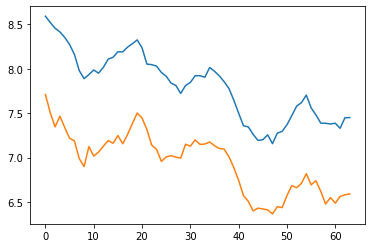

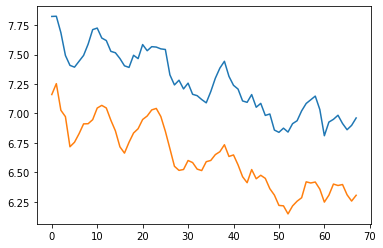

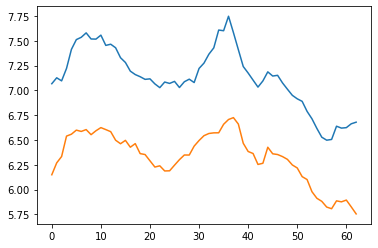

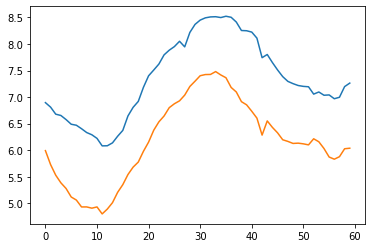

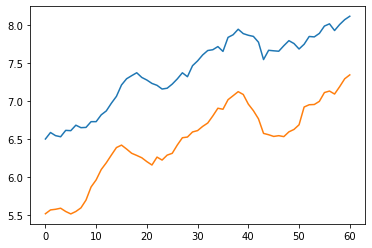

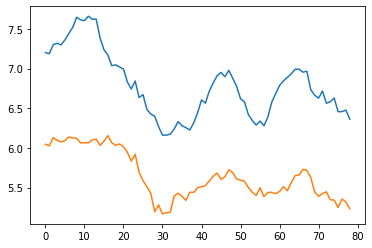

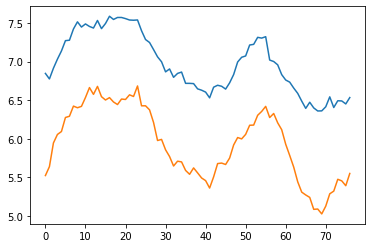

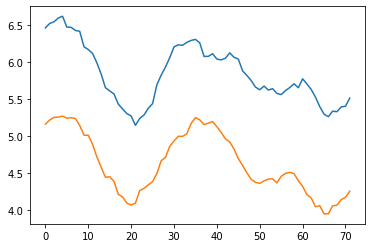

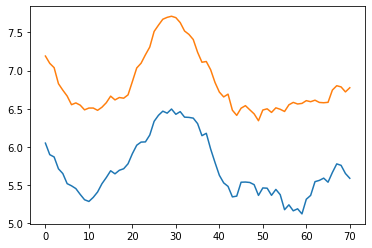

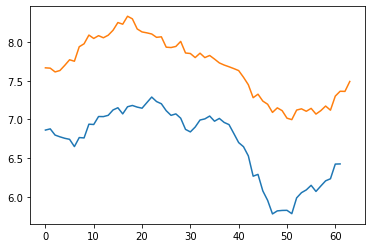

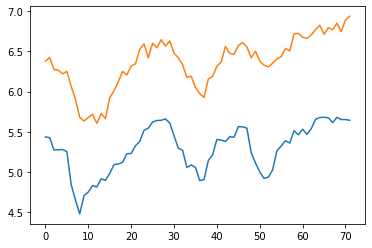

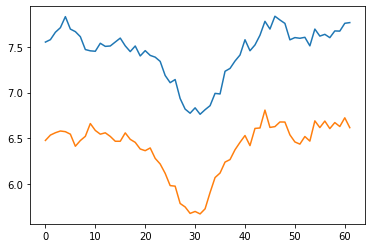

In [38]:
for i in deltaMTBD_compiled_data.Experiment.unique():
    pair = deltaMTBD_compiled_data[deltaMTBD_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_dist']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_dist']
    pair_b = pair_b.reset_index()
    deltaMTBD_compiled_data.at[pair_a.index[0], 'KT_dist'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    deltaMTBD_compiled_data.at[pair_b.index[0], 'KT_dist'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

    plt.plot(pair_a['KT_dist'])
    plt.plot(pair_b['KT_dist'])
    plt.show()
    

### SKAP_5D overexp experiments

In [39]:
FiveDover_compiled_data = pd.DataFrame(columns = ["Experiment", "KT_sister", "Time", "KT_dist"])



for column in raw_data:
    if column.startswith("F"):
        kt_dist=raw_data[column][raw_data[column].notnull()].tolist()
        FiveDover_kt_names = [column[:-1]] * len(kt_dist)
        FiveDover_sis_names = [column[-1]] * len(kt_dist)
        time_kt=raw_data["Time"][raw_data[column].notnull()].tolist()
#         print(len(time_kt),len(kt_dist))
        zippedList =  list(zip(FiveDover_kt_names, FiveDover_sis_names, time_kt, kt_dist))
        df_temp = pd.DataFrame(zippedList,columns = ["Experiment", "KT_sister", "Time", "KT_dist"])
        FiveDover_compiled_data = pd.concat([FiveDover_compiled_data, df_temp], axis=0, sort=False, ignore_index = True)
FiveDover_compiled_data

,Experiment,KT_sister,Time,KT_dist
0,FiveD_5D_overexp_20230608_1.5mlVirus_cell01_kt1,a,3,6.679978
1,FiveD_5D_overexp_20230608_1.5mlVirus_cell01_kt1,a,6,6.610826
2,FiveD_5D_overexp_20230608_1.5mlVirus_cell01_kt1,a,9,6.637365
3,FiveD_5D_overexp_20230608_1.5mlVirus_cell01_kt1,a,12,6.563892
4,FiveD_5D_overexp_20230608_1.5mlVirus_cell01_kt1,a,15,6.548754
...,...,...,...,...
2303,FiveD_5D_overexp_20230623_1.5mlVirus_cell06_kt1,b,213,6.556082
2304,FiveD_5D_overexp_20230623_1.5mlVirus_cell06_kt1,b,216,6.607275
2305,FiveD_5D_overexp_20230623_1.5mlVirus_cell06_kt1,b,219,6.612996
2306,FiveD_5D_overexp_20230623_1.5mlVirus_cell06_kt1,b,222,6.699182


### Calculate speed of kinetochore movement at every time point (5D overexpression)

In [40]:
FiveDover_kt_speed_list=[]
for t in range(0,len(FiveDover_compiled_data.KT_dist)-1):
    FiveDover_kt_speed = (60*(FiveDover_compiled_data.KT_dist[t+1] - FiveDover_compiled_data.KT_dist[t]))/3 #speed calculation from the entire list
#     print(t,kt_speed)
    FiveDover_kt_speed_list.append(FiveDover_kt_speed) #transform the data in a actual phyton list
FiveDover_kt_speed_list.insert(0, np.nan) #insert an empty opsition at the first position (0) of the list

FiveDover_kt_speed=pd.Series(FiveDover_kt_speed_list) #transform the list in to a series (a column like on a table)


FiveDover_compiled_data["KT_speed"]=FiveDover_kt_speed #add a new column named (KT_speed) with the data kt_speed
FiveDover_compiled_data



,Experiment,KT_sister,Time,KT_dist,KT_speed
0,FiveD_5D_overexp_20230608_1.5mlVirus_cell01_kt1,a,3,6.679978,NaN
1,FiveD_5D_overexp_20230608_1.5mlVirus_cell01_kt1,a,6,6.610826,-1.383035
2,FiveD_5D_overexp_20230608_1.5mlVirus_cell01_kt1,a,9,6.637365,0.530788
3,FiveD_5D_overexp_20230608_1.5mlVirus_cell01_kt1,a,12,6.563892,-1.469471
4,FiveD_5D_overexp_20230608_1.5mlVirus_cell01_kt1,a,15,6.548754,-0.302752
...,...,...,...,...,...
2303,FiveD_5D_overexp_20230623_1.5mlVirus_cell06_kt1,b,213,6.556082,3.811293
2304,FiveD_5D_overexp_20230623_1.5mlVirus_cell06_kt1,b,216,6.607275,1.023857
2305,FiveD_5D_overexp_20230623_1.5mlVirus_cell06_kt1,b,219,6.612996,0.114420
2306,FiveD_5D_overexp_20230623_1.5mlVirus_cell06_kt1,b,222,6.699182,1.723728


In [41]:
# remove the first value of each pair at the KT_speed, so it is not calculated using the last value from the previous KT

FiveDover_compiled_data.loc[FiveDover_compiled_data["Time"] == 3, "KT_speed"] = np.nan   #change the first KT_speed value of each kinetochore (time 3 s) to 0
FiveDover_compiled_data

# compiled_data.to_excel ("compiled_data.xlsx")


,Experiment,KT_sister,Time,KT_dist,KT_speed
0,FiveD_5D_overexp_20230608_1.5mlVirus_cell01_kt1,a,3,6.679978,NaN
1,FiveD_5D_overexp_20230608_1.5mlVirus_cell01_kt1,a,6,6.610826,-1.383035
2,FiveD_5D_overexp_20230608_1.5mlVirus_cell01_kt1,a,9,6.637365,0.530788
3,FiveD_5D_overexp_20230608_1.5mlVirus_cell01_kt1,a,12,6.563892,-1.469471
4,FiveD_5D_overexp_20230608_1.5mlVirus_cell01_kt1,a,15,6.548754,-0.302752
...,...,...,...,...,...
2303,FiveD_5D_overexp_20230623_1.5mlVirus_cell06_kt1,b,213,6.556082,3.811293
2304,FiveD_5D_overexp_20230623_1.5mlVirus_cell06_kt1,b,216,6.607275,1.023857
2305,FiveD_5D_overexp_20230623_1.5mlVirus_cell06_kt1,b,219,6.612996,0.114420
2306,FiveD_5D_overexp_20230623_1.5mlVirus_cell06_kt1,b,222,6.699182,1.723728


### Calculate the standard deviation of the position of each kinetochore over time (5D overexpression)

In [42]:
FiveDover_position_stdev=[]#open this to be able to get a list from the above calculations

for i in FiveDover_compiled_data.Experiment.unique():
    pair = FiveDover_compiled_data[FiveDover_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_dist']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_dist']
    pair_b = pair_b.reset_index()

   
      
    FiveDover_stdev_pair_a=pair_a['KT_dist'][1:].std()
    FiveDover_stdev_pair_b=pair_b['KT_dist'][1:].std()
    FiveDover_position_stdev.append(FiveDover_stdev_pair_a)
    FiveDover_position_stdev.append(FiveDover_stdev_pair_b)
#     print(stdev_pair_a,stdev_pair_b)

# print(FiveDover_position_stdev)



### velocity correlation between sister kinetochores within a pair (5D overexpression)

In [44]:
FiveDover_velocity_correlation=[]

for i in FiveDover_compiled_data.Experiment.unique():
    pair = FiveDover_compiled_data[FiveDover_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    FiveDover_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    FiveDover_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b



    
    velocity_correlation=pair_a["KT_speed"][1:].corr(pair_b["KT_speed"][1:], method='spearman')
    FiveDover_velocity_correlation.append(velocity_correlation)

    

### kinetochore speed calculation (5D overexpression)

In [45]:
FiveDover_kt_speed_mean_abs=[] #open this to be able to get a list from the above calculations


for i in FiveDover_compiled_data.Experiment.unique():
    pair = FiveDover_compiled_data[FiveDover_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    FiveDover_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    FiveDover_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

#     print(pair_a)
    pair_a_abs=pair_a['KT_speed'][1:].abs()
    pair_b_abs=pair_b['KT_speed'][1:].abs()
#     print(pair_a)
    
    FiveDover_kt_a_speed_mean_abs=mean(pair_a_abs) #getting the average speed of each kinetochore (first the a and then the b) 
    FiveDover_kt_b_speed_mean_abs=mean(pair_b_abs)
    FiveDover_kt_speed_mean_abs.append(FiveDover_kt_a_speed_mean_abs) #add the 2 groups of KT_speed average to the same list, so I can plot it together and also keep and refear to the data once out of the loop
    FiveDover_kt_speed_mean_abs.append(FiveDover_kt_b_speed_mean_abs)

#     print(kt_a_speed_mean,kt_b_speed_mean)
 

### amount of time sister kinetochore pairs move in opposite directions (5D overexpression)

In [46]:
FiveDover_KT_oposite_movement_freq=[]

for i in FiveDover_compiled_data.Experiment.unique():
    pair = FiveDover_compiled_data[FiveDover_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    FiveDover_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    FiveDover_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

    FiveDover_speed_multiplication=pair_a['KT_speed'][1:]*pair_b['KT_speed'][1:] #to get the ooposite ovement as a negative value(+*-=-)
#     print(SKAP_speed_multiplication)
    FiveDover_number_oposite=sum(n < 0 for n in FiveDover_speed_multiplication)
#     WTSKAP_number_oposite=WTSKAP_speed_multiplication.lt(0).sum().sum() # complicated option that I do not understand obtained from https://stackoverflow.com/questions/36155942/need-count-of-negative-values-in-a-dataframe

    FiveDover_proportion_oposite_movement=100*FiveDover_number_oposite/len(pair_a["KT_speed"][1:]) #to get the percentage
#     print(RescWTSKAP_number_oposite), print(len(pair_a['KT_speed'])), print(RescWTSKAP_proportion_oposite_movement), print(RescWTSKAP_speed_multiplication)
    FiveDover_KT_oposite_movement_freq.append(FiveDover_proportion_oposite_movement)
print(FiveDover_KT_oposite_movement_freq)


[16.666666666666668, 26.984126984126984, 22.033898305084747, 43.24324324324324, 26.19047619047619, 31.3953488372093, 31.147540983606557, 18.6046511627907, 18.29268292682927, 29.41176470588235, 31.818181818181817, 29.09090909090909, 21.25, 23.28767123287671, 35.61643835616438, 24.324324324324323]


### oscillations tracks graphs by pair (5D overexpression)

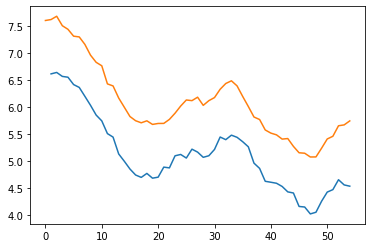

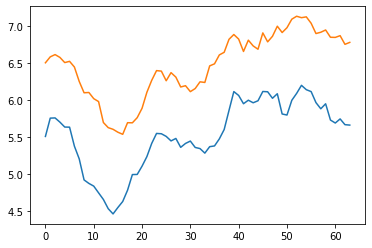

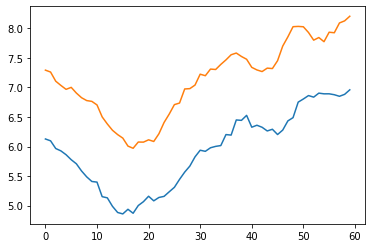

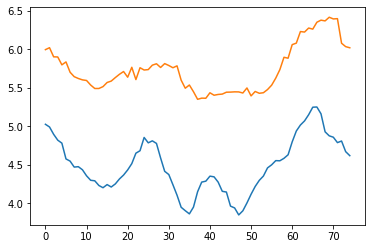

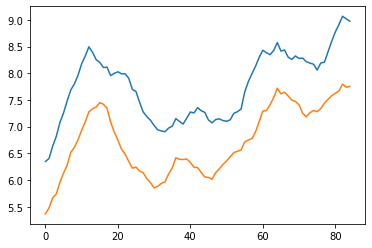

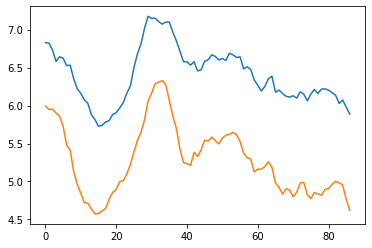

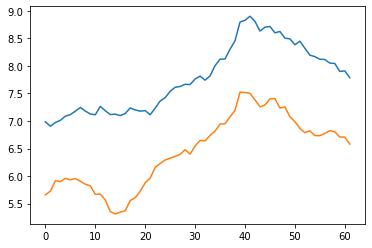

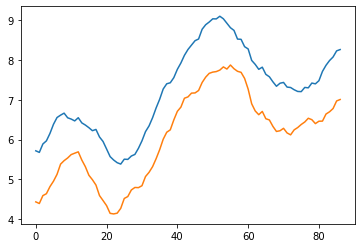

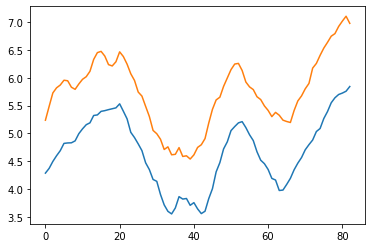

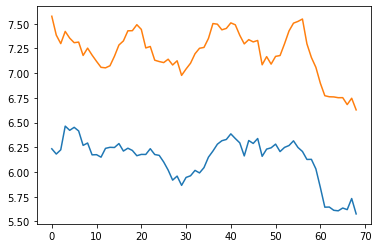

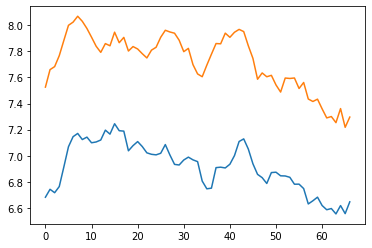

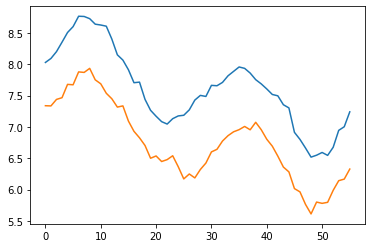

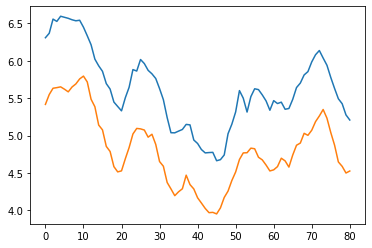

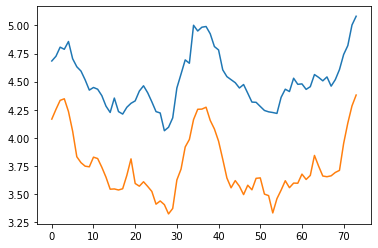

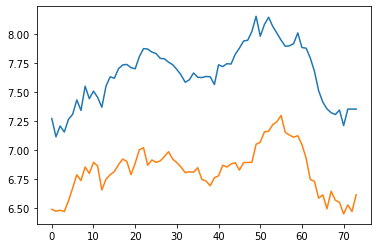

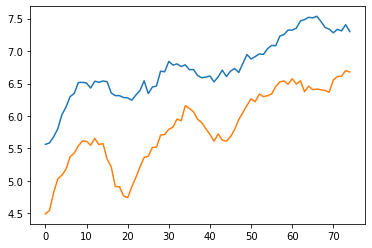

In [51]:
for i in FiveDover_compiled_data.Experiment.unique():
    pair = FiveDover_compiled_data[FiveDover_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_dist']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_dist']
    pair_b = pair_b.reset_index()
    FiveDover_compiled_data.at[pair_a.index[0], 'KT_dist'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    FiveDover_compiled_data.at[pair_b.index[0], 'KT_dist'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

    plt.plot(pair_a['KT_dist'])
    plt.plot(pair_b['KT_dist'])
    plt.show()
    

### SKAP_WT RESCUE

In [53]:
RescWTSKAP_compiled_data = pd.DataFrame(columns = ["Experiment", "KT_sister", "Time", "KT_dist"])



for column in raw_data:
    if column.startswith("R"):
        kt_dist=raw_data[column][raw_data[column].notnull()].tolist()
        RescWTSKAP_kt_names = [column[:-1]] * len(kt_dist)
        RescWTSKAP_sis_names = [column[-1]] * len(kt_dist)
        time_kt=raw_data["Time"][raw_data[column].notnull()].tolist()
#         print(len(time_kt),len(kt_dist))
        zippedList =  list(zip(RescWTSKAP_kt_names, RescWTSKAP_sis_names, time_kt, kt_dist))
        df_temp = pd.DataFrame(zippedList,columns = ["Experiment", "KT_sister", "Time", "KT_dist"])
        RescWTSKAP_compiled_data = pd.concat([RescWTSKAP_compiled_data, df_temp], axis=0, sort=False, ignore_index = True)
RescWTSKAP_compiled_data

,Experiment,KT_sister,Time,KT_dist
0,RESCUE_WTSKAP_20230412_1.5mlVirus_cell01_kt1,a,3,6.693193
1,RESCUE_WTSKAP_20230412_1.5mlVirus_cell01_kt1,a,6,6.771388
2,RESCUE_WTSKAP_20230412_1.5mlVirus_cell01_kt1,a,9,6.762910
3,RESCUE_WTSKAP_20230412_1.5mlVirus_cell01_kt1,a,12,6.791726
4,RESCUE_WTSKAP_20230412_1.5mlVirus_cell01_kt1,a,15,6.873321
...,...,...,...,...
2716,RESCUE_WTSKAP_20230816__cell08_kt1,b,174,7.055144
2717,RESCUE_WTSKAP_20230816__cell08_kt1,b,177,6.907133
2718,RESCUE_WTSKAP_20230816__cell08_kt1,b,180,6.760688
2719,RESCUE_WTSKAP_20230816__cell08_kt1,b,183,6.691181


### Calculate speed of kinetochore movement at every time point (WT_SKAP_Rescue)

In [55]:
RescWTSKAP_kt_speed_list=[]
for t in range(0,len(RescWTSKAP_compiled_data.KT_dist)-1):
    RescWTSKAP_kt_speed = (60*(RescWTSKAP_compiled_data.KT_dist[t+1] - RescWTSKAP_compiled_data.KT_dist[t]))/3 #speed calculation from the entire list
#     print(t,kt_speed)
    RescWTSKAP_kt_speed_list.append(RescWTSKAP_kt_speed) #transform the data in a actual phyton list
RescWTSKAP_kt_speed_list.insert(0, np.nan) #insert an empty opsition at the first position (0) of the list

RescWTSKAP_kt_speed=pd.Series(RescWTSKAP_kt_speed_list) #transform the list in to a series (a column like on a table)


RescWTSKAP_compiled_data["KT_speed"]=RescWTSKAP_kt_speed #add a new column named (KT_speed) with the data kt_speed
RescWTSKAP_compiled_data



,Experiment,KT_sister,Time,KT_dist,KT_speed
0,RESCUE_WTSKAP_20230412_1.5mlVirus_cell01_kt1,a,3,6.693193,NaN
1,RESCUE_WTSKAP_20230412_1.5mlVirus_cell01_kt1,a,6,6.771388,1.563888
2,RESCUE_WTSKAP_20230412_1.5mlVirus_cell01_kt1,a,9,6.762910,-0.169560
3,RESCUE_WTSKAP_20230412_1.5mlVirus_cell01_kt1,a,12,6.791726,0.576334
4,RESCUE_WTSKAP_20230412_1.5mlVirus_cell01_kt1,a,15,6.873321,1.631895
...,...,...,...,...,...
2716,RESCUE_WTSKAP_20230816__cell08_kt1,b,174,7.055144,-3.545100
2717,RESCUE_WTSKAP_20230816__cell08_kt1,b,177,6.907133,-2.960219
2718,RESCUE_WTSKAP_20230816__cell08_kt1,b,180,6.760688,-2.928894
2719,RESCUE_WTSKAP_20230816__cell08_kt1,b,183,6.691181,-1.390132


In [56]:
# remove the first value of each pair at the KT_speed, so it is not calculated using the last value from the previous KT

RescWTSKAP_compiled_data.loc[RescWTSKAP_compiled_data["Time"] == 3, "KT_speed"] = np.nan   #change the first KT_speed value of each kinetochore (time 3 s) to 0
RescWTSKAP_compiled_data

# compiled_data.to_excel ("compiled_data.xlsx")


,Experiment,KT_sister,Time,KT_dist,KT_speed
0,RESCUE_WTSKAP_20230412_1.5mlVirus_cell01_kt1,a,3,6.693193,NaN
1,RESCUE_WTSKAP_20230412_1.5mlVirus_cell01_kt1,a,6,6.771388,1.563888
2,RESCUE_WTSKAP_20230412_1.5mlVirus_cell01_kt1,a,9,6.762910,-0.169560
3,RESCUE_WTSKAP_20230412_1.5mlVirus_cell01_kt1,a,12,6.791726,0.576334
4,RESCUE_WTSKAP_20230412_1.5mlVirus_cell01_kt1,a,15,6.873321,1.631895
...,...,...,...,...,...
2716,RESCUE_WTSKAP_20230816__cell08_kt1,b,174,7.055144,-3.545100
2717,RESCUE_WTSKAP_20230816__cell08_kt1,b,177,6.907133,-2.960219
2718,RESCUE_WTSKAP_20230816__cell08_kt1,b,180,6.760688,-2.928894
2719,RESCUE_WTSKAP_20230816__cell08_kt1,b,183,6.691181,-1.390132


### Calculate the standard deviation of the position of each kinetochore over time (WT_SKAP Rescue)

In [58]:
RescWTSKAP_position_stdev=[]#open this to be able to get a list from the above calculations

for i in RescWTSKAP_compiled_data.Experiment.unique():
    pair = RescWTSKAP_compiled_data[RescWTSKAP_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_dist']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_dist']
    pair_b = pair_b.reset_index()

   
      
    RescWTSKAP_stdev_pair_a=pair_a['KT_dist'][1:].std()
    RescWTSKAP_stdev_pair_b=pair_b['KT_dist'][1:].std()
    RescWTSKAP_position_stdev.append(RescWTSKAP_stdev_pair_a)
    RescWTSKAP_position_stdev.append(RescWTSKAP_stdev_pair_b)
#     print(stdev_pair_a,stdev_pair_b)

# print(RescWTSKAP_position_stdev)



### velocity correlation between sister kinetochores within a pair (WT_SKAP Rescue)

In [61]:
RescWTSKAP_velocity_correlation=[]

for i in RescWTSKAP_compiled_data.Experiment.unique():
    pair = RescWTSKAP_compiled_data[RescWTSKAP_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    RescWTSKAP_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    RescWTSKAP_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b


    
    velocity_correlation=pair_a["KT_speed"][1:].corr(pair_b["KT_speed"][1:], method='spearman')
    RescWTSKAP_velocity_correlation.append(velocity_correlation)

    

### kinetochore speed calculation (WT_SKAP Rescue)

In [63]:
RescWTSKAP_kt_speed_mean_abs=[] #open this to be able to get a list from the above calculations


for i in RescWTSKAP_compiled_data.Experiment.unique():
    pair = RescWTSKAP_compiled_data[RescWTSKAP_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    RescWTSKAP_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    RescWTSKAP_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

#     print(pair_a)
    pair_a_abs=pair_a['KT_speed'][1:].abs()
    pair_b_abs=pair_b['KT_speed'][1:].abs()
#     print(pair_a)
    
    RescWTSKAP_kt_a_speed_mean_abs=mean(pair_a_abs) #getting the average speed of each kinetochore (first the a and then the b) 
    RescWTSKAP_kt_b_speed_mean_abs=mean(pair_b_abs)
    RescWTSKAP_kt_speed_mean_abs.append(RescWTSKAP_kt_a_speed_mean_abs) #add the 2 groups of KT_speed average to the same list, so I can plot it together and also keep and refear to the data once out of the loop
    RescWTSKAP_kt_speed_mean_abs.append(RescWTSKAP_kt_b_speed_mean_abs)

#     print(kt_a_speed_mean,kt_b_speed_mean)
 

### amount of time sister kinetochore pairs move in opposite directions (WT_SKAP Rescue)

In [65]:
RescWTSKAP_KT_oposite_movement_freq=[]

for i in RescWTSKAP_compiled_data.Experiment.unique():
    pair = RescWTSKAP_compiled_data[RescWTSKAP_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    RescWTSKAP_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    RescWTSKAP_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

    RescWTSKAP_speed_multiplication=pair_a['KT_speed'][1:]*pair_b['KT_speed'][1:] #to get the ooposite ovement as a negative value(+*-=-)
#     print(SKAP_speed_multiplication)
    RescWTSKAP_number_oposite=sum(n < 0 for n in RescWTSKAP_speed_multiplication)
#     WTSKAP_number_oposite=WTSKAP_speed_multiplication.lt(0).sum().sum() # complicated option that I do not understand obtained from https://stackoverflow.com/questions/36155942/need-count-of-negative-values-in-a-dataframe

    RescWTSKAP_proportion_oposite_movement=100*RescWTSKAP_number_oposite/len(pair_a["KT_speed"][1:]) #to get the percentage
#     print(RescWTSKAP_number_oposite), print(len(pair_a['KT_speed'])), print(RescWTSKAP_proportion_oposite_movement), print(RescWTSKAP_speed_multiplication)
    RescWTSKAP_KT_oposite_movement_freq.append(RescWTSKAP_proportion_oposite_movement)
print(RescWTSKAP_KT_oposite_movement_freq)


[39.436619718309856, 16.216216216216218, 25.675675675675677, 17.91044776119403, 28.037383177570092, 9.67741935483871, 26.5625, 21.686746987951807, 24.675324675324674, 17.857142857142858, 25.58139534883721, 18.571428571428573, 16.129032258064516, 24.444444444444443, 19.718309859154928, 18.42105263157895, 26.229508196721312]


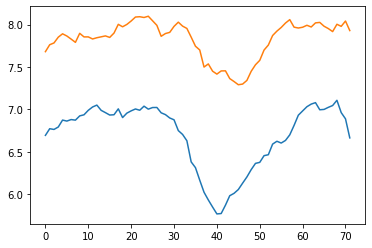

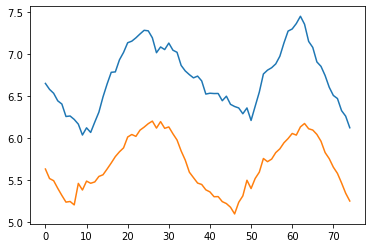

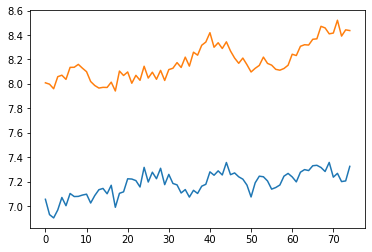

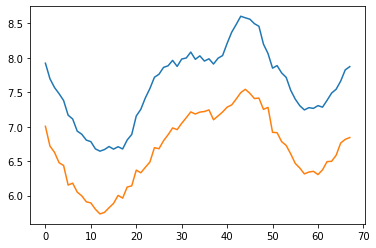

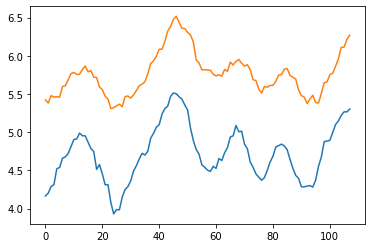

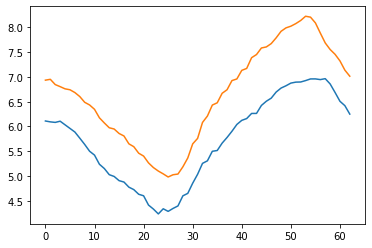

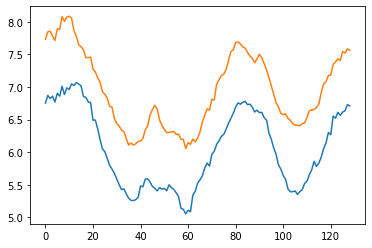

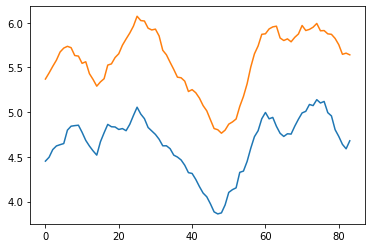

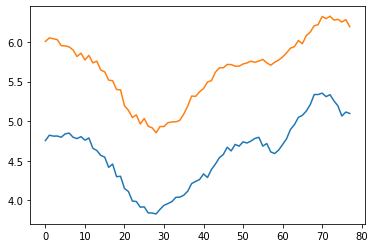

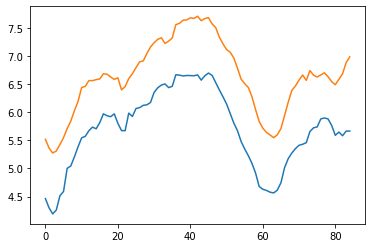

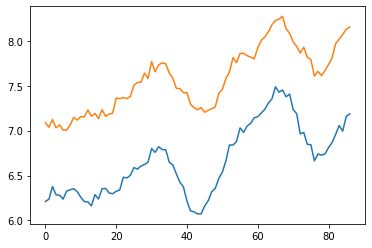

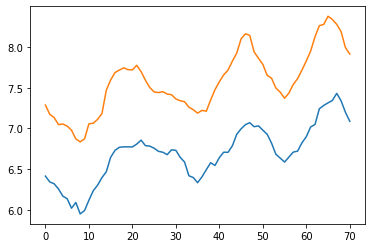

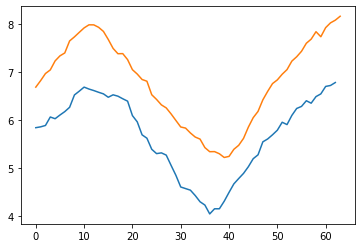

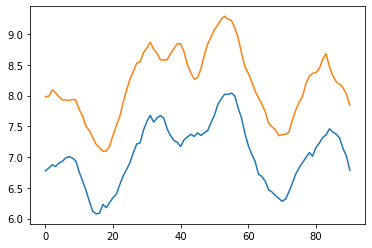

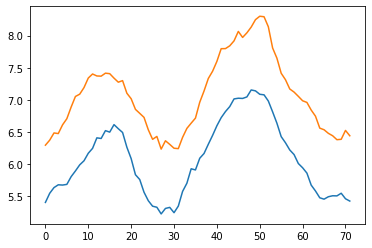

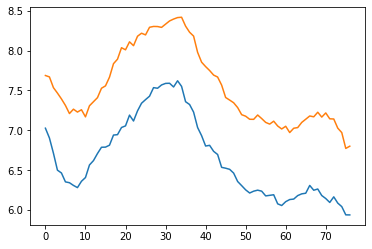

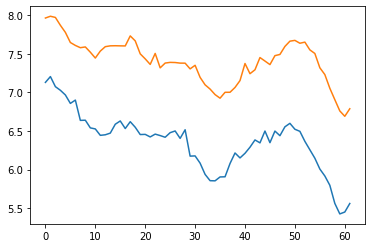

In [66]:
for i in RescWTSKAP_compiled_data.Experiment.unique():
    pair = RescWTSKAP_compiled_data[RescWTSKAP_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_dist']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_dist']
    pair_b = pair_b.reset_index()
    RescWTSKAP_compiled_data.at[pair_a.index[0], 'KT_dist'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    RescWTSKAP_compiled_data.at[pair_b.index[0], 'KT_dist'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

    plt.plot(pair_a['KT_dist'])
    plt.plot(pair_b['KT_dist'])
    plt.show()
    

### SKAP_deltaMTBD RESCUE

In [68]:
RescdeltaMTBD_compiled_data = pd.DataFrame(columns = ["Experiment", "KT_sister", "Time", "KT_dist"])



for column in raw_data:
    if column.startswith("M"):
        kt_dist=raw_data[column][raw_data[column].notnull()].tolist()
        RescdeltaMTBD_kt_names = [column[:-1]] * len(kt_dist)
        RescdeltaMTBD_sis_names = [column[-1]] * len(kt_dist)
        time_kt=raw_data["Time"][raw_data[column].notnull()].tolist()
#         print(len(time_kt),len(kt_dist))
        zippedList =  list(zip(RescdeltaMTBD_kt_names, RescdeltaMTBD_sis_names, time_kt, kt_dist))
        df_temp = pd.DataFrame(zippedList,columns = ["Experiment", "KT_sister", "Time", "KT_dist"])
        RescdeltaMTBD_compiled_data = pd.concat([RescdeltaMTBD_compiled_data, df_temp], axis=0, sort=False, ignore_index = True)
RescdeltaMTBD_compiled_data

,Experiment,KT_sister,Time,KT_dist
0,MTBDdelta_rescue_20230517_cell01_kt1,a,3,6.019052
1,MTBDdelta_rescue_20230517_cell01_kt1,a,6,5.970916
2,MTBDdelta_rescue_20230517_cell01_kt1,a,9,6.115336
3,MTBDdelta_rescue_20230517_cell01_kt1,a,12,6.051839
4,MTBDdelta_rescue_20230517_cell01_kt1,a,15,6.122436
...,...,...,...,...
2635,MTBDdelta_rescue_20230920_cell05_kt3,b,273,4.778737
2636,MTBDdelta_rescue_20230920_cell05_kt3,b,276,4.707864
2637,MTBDdelta_rescue_20230920_cell05_kt3,b,279,4.666629
2638,MTBDdelta_rescue_20230920_cell05_kt3,b,282,4.613914


### Calculate speed of kinetochore movement at every time point (deltaMTBD_SKAP_Rescue)

In [70]:
RescdeltaMTBD_kt_speed_list=[]
for t in range(0,len(RescdeltaMTBD_compiled_data.KT_dist)-1):
    RescdeltaMTBD_kt_speed = (60*(RescdeltaMTBD_compiled_data.KT_dist[t+1] - RescdeltaMTBD_compiled_data.KT_dist[t]))/3 #speed calculation from the entire list
#     print(t,kt_speed)
    RescdeltaMTBD_kt_speed_list.append(RescdeltaMTBD_kt_speed) #transform the data in a actual phyton list
RescdeltaMTBD_kt_speed_list.insert(0, np.nan) #insert an empty opsition at the first position (0) of the list

RescdeltaMTBD_kt_speed=pd.Series(RescdeltaMTBD_kt_speed_list) #transform the list in to a series (a column like on a table)


RescdeltaMTBD_compiled_data["KT_speed"]=RescdeltaMTBD_kt_speed #add a new column named (KT_speed) with the data kt_speed
RescdeltaMTBD_compiled_data



,Experiment,KT_sister,Time,KT_dist,KT_speed
0,MTBDdelta_rescue_20230517_cell01_kt1,a,3,6.019052,NaN
1,MTBDdelta_rescue_20230517_cell01_kt1,a,6,5.970916,-0.962718
2,MTBDdelta_rescue_20230517_cell01_kt1,a,9,6.115336,2.888394
3,MTBDdelta_rescue_20230517_cell01_kt1,a,12,6.051839,-1.269930
4,MTBDdelta_rescue_20230517_cell01_kt1,a,15,6.122436,1.411928
...,...,...,...,...,...
2635,MTBDdelta_rescue_20230920_cell05_kt3,b,273,4.778737,-1.611453
2636,MTBDdelta_rescue_20230920_cell05_kt3,b,276,4.707864,-1.417460
2637,MTBDdelta_rescue_20230920_cell05_kt3,b,279,4.666629,-0.824708
2638,MTBDdelta_rescue_20230920_cell05_kt3,b,282,4.613914,-1.054292


In [71]:
# remove the first value of each pair at the KT_speed, so it is not calculated using the last value from the previous KT

RescdeltaMTBD_compiled_data.loc[RescdeltaMTBD_compiled_data["Time"] == 3, "KT_speed"] = np.nan   #change the first KT_speed value of each kinetochore (time 3 s) to 0
RescdeltaMTBD_compiled_data

# compiled_data.to_excel ("compiled_data.xlsx")


,Experiment,KT_sister,Time,KT_dist,KT_speed
0,MTBDdelta_rescue_20230517_cell01_kt1,a,3,6.019052,NaN
1,MTBDdelta_rescue_20230517_cell01_kt1,a,6,5.970916,-0.962718
2,MTBDdelta_rescue_20230517_cell01_kt1,a,9,6.115336,2.888394
3,MTBDdelta_rescue_20230517_cell01_kt1,a,12,6.051839,-1.269930
4,MTBDdelta_rescue_20230517_cell01_kt1,a,15,6.122436,1.411928
...,...,...,...,...,...
2635,MTBDdelta_rescue_20230920_cell05_kt3,b,273,4.778737,-1.611453
2636,MTBDdelta_rescue_20230920_cell05_kt3,b,276,4.707864,-1.417460
2637,MTBDdelta_rescue_20230920_cell05_kt3,b,279,4.666629,-0.824708
2638,MTBDdelta_rescue_20230920_cell05_kt3,b,282,4.613914,-1.054292


### Calculate the standard deviation of the position of each kinetochore over time (deltaMTBD_SKAP Rescue)

In [73]:
RescdeltaMTBD_position_stdev=[]#open this to be able to get a list from the above calculations

for i in RescdeltaMTBD_compiled_data.Experiment.unique():
    pair = RescdeltaMTBD_compiled_data[RescdeltaMTBD_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_dist']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_dist']
    pair_b = pair_b.reset_index()

   
      
    RescdeltaMTBD_stdev_pair_a=pair_a['KT_dist'][1:].std()
    RescdeltaMTBD_stdev_pair_b=pair_b['KT_dist'][1:].std()
    RescdeltaMTBD_position_stdev.append(RescdeltaMTBD_stdev_pair_a)
    RescdeltaMTBD_position_stdev.append(RescdeltaMTBD_stdev_pair_b)
#     print(stdev_pair_a,stdev_pair_b)

# print(RescdeltaMTBD_position_stdev)



### velocity correlation between sister kinetochores within a pair (deltaMTBD_SKAP Rescue)

In [76]:
RescdeltaMTBD_velocity_correlation=[]

for i in RescdeltaMTBD_compiled_data.Experiment.unique():
    pair = RescdeltaMTBD_compiled_data[RescdeltaMTBD_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    RescdeltaMTBD_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    RescdeltaMTBD_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b


    
    velocity_correlation=pair_a["KT_speed"][1:].corr(pair_b["KT_speed"][1:], method='spearman')
    RescdeltaMTBD_velocity_correlation.append(velocity_correlation)

    

### kinetochore speed calculation (deltaMTBD_SKAP Rescue)

In [78]:
RescdeltaMTBD_kt_speed_mean_abs=[] #open this to be able to get a list from the above calculations


for i in RescdeltaMTBD_compiled_data.Experiment.unique():
    pair = RescdeltaMTBD_compiled_data[RescdeltaMTBD_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    RescdeltaMTBD_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    RescdeltaMTBD_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

#     print(pair_a)
    pair_a_abs=pair_a['KT_speed'][1:].abs()
    pair_b_abs=pair_b['KT_speed'][1:].abs()
#     print(pair_a)
    
    RescdeltaMTBD_kt_a_speed_mean_abs=mean(pair_a_abs) #getting the average speed of each kinetochore (first the a and then the b) 
    RescdeltaMTBD_kt_b_speed_mean_abs=mean(pair_b_abs)
    RescdeltaMTBD_kt_speed_mean_abs.append(RescdeltaMTBD_kt_a_speed_mean_abs) #add the 2 groups of KT_speed average to the same list, so I can plot it together and also keep and refear to the data once out of the loop
    RescdeltaMTBD_kt_speed_mean_abs.append(RescdeltaMTBD_kt_b_speed_mean_abs)

#     print(kt_a_speed_mean,kt_b_speed_mean)
 

### amount of time sister kinetochore pairs move in opposite directions (deltaMTBD_SKAP Rescue)

In [80]:
RescdeltaMTBD_KT_oposite_movement_freq=[]

for i in RescdeltaMTBD_compiled_data.Experiment.unique():
    pair = RescdeltaMTBD_compiled_data[RescdeltaMTBD_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    RescdeltaMTBD_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    RescdeltaMTBD_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

    RescdeltaMTBD_speed_multiplication=pair_a['KT_speed'][1:]*pair_b['KT_speed'][1:] #to get the ooposite ovement as a negative value(+*-=-)
#     print(RescdeltaMTBD_speed_multiplication)
    RescdeltaMTBD_number_oposite=sum(n < 0 for n in RescdeltaMTBD_speed_multiplication)
#     RescdeltaMTBD_number_oposite=RescdeltaMTBD_speed_multiplication.lt(0).sum().sum() # complicated option that I do not understand obtained from https://stackoverflow.com/questions/36155942/need-count-of-negative-values-in-a-dataframe

    RescdeltaMTBD_proportion_oposite_movement=100*RescdeltaMTBD_number_oposite/len(pair_a["KT_speed"][1:]) #to get the percentage
#     print(RescdeltaMTBD_number_oposite), print(len(pair_a['KT_speed'])), print(RescdeltaMTBD_proportion_oposite_movement), print(RescWTSKAP_speed_multiplication)
    RescdeltaMTBD_KT_oposite_movement_freq.append(RescdeltaMTBD_proportion_oposite_movement)
print(RescdeltaMTBD_KT_oposite_movement_freq)


[29.310344827586206, 41.791044776119406, 40.84507042253521, 40.27777777777778, 21.311475409836067, 17.1875, 26.582278481012658, 39.130434782608695, 44.067796610169495, 26.08695652173913, 26.984126984126984, 36.507936507936506, 36.486486486486484, 17.24137931034483, 24.0, 20.54794520547945, 17.28395061728395, 24.46808510638298]


### SKAP_5D RESCUE

In [82]:
Resc5D_compiled_data = pd.DataFrame(columns = ["Experiment", "KT_sister", "Time", "KT_dist"])



for column in raw_data:
    if column.startswith("D"):
        kt_dist=raw_data[column][raw_data[column].notnull()].tolist()
        Resc5D_kt_names = [column[:-1]] * len(kt_dist)
        Resc5D_sis_names = [column[-1]] * len(kt_dist)
        time_kt=raw_data["Time"][raw_data[column].notnull()].tolist()
#         print(len(time_kt),len(kt_dist))
        zippedList =  list(zip(Resc5D_kt_names, Resc5D_sis_names, time_kt, kt_dist))
        df_temp = pd.DataFrame(zippedList,columns = ["Experiment", "KT_sister", "Time", "KT_dist"])
        Resc5D_compiled_data = pd.concat([Resc5D_compiled_data, df_temp], axis=0, sort=False, ignore_index = True)
Resc5D_compiled_data

,Experiment,KT_sister,Time,KT_dist
0,D_5D_rescue_20230628_cell01_kt1,a,3,7.714896
1,D_5D_rescue_20230628_cell01_kt1,a,6,7.543653
2,D_5D_rescue_20230628_cell01_kt1,a,9,7.427454
3,D_5D_rescue_20230628_cell01_kt1,a,12,7.462048
4,D_5D_rescue_20230628_cell01_kt1,a,15,7.387059
...,...,...,...,...
2951,D_5D_rescue_20230920_cell03_kt1,b,207,7.758128
2952,D_5D_rescue_20230920_cell03_kt1,b,210,7.712870
2953,D_5D_rescue_20230920_cell03_kt1,b,213,7.635812
2954,D_5D_rescue_20230920_cell03_kt1,b,216,7.492304


### Calculate speed of kinetochore movement at every time point (5D_SKAP_Rescue)

In [84]:
Resc5D_kt_speed_list=[]
for t in range(0,len(Resc5D_compiled_data.KT_dist)-1):
    Resc5D_kt_speed = (60*(Resc5D_compiled_data.KT_dist[t+1] - Resc5D_compiled_data.KT_dist[t]))/3 #speed calculation from the entire list
#     print(t,kt_speed)
    Resc5D_kt_speed_list.append(Resc5D_kt_speed) #transform the data in a actual phyton list
Resc5D_kt_speed_list.insert(0, np.nan) #insert an empty opsition at the first position (0) of the list

Resc5D_kt_speed=pd.Series(Resc5D_kt_speed_list) #transform the list in to a series (a column like on a table)


Resc5D_compiled_data["KT_speed"]=Resc5D_kt_speed #add a new column named (KT_speed) with the data kt_speed
Resc5D_compiled_data



,Experiment,KT_sister,Time,KT_dist,KT_speed
0,D_5D_rescue_20230628_cell01_kt1,a,3,7.714896,NaN
1,D_5D_rescue_20230628_cell01_kt1,a,6,7.543653,-3.424859
2,D_5D_rescue_20230628_cell01_kt1,a,9,7.427454,-2.323982
3,D_5D_rescue_20230628_cell01_kt1,a,12,7.462048,0.691877
4,D_5D_rescue_20230628_cell01_kt1,a,15,7.387059,-1.499786
...,...,...,...,...,...
2951,D_5D_rescue_20230920_cell03_kt1,b,207,7.758128,-2.741733
2952,D_5D_rescue_20230920_cell03_kt1,b,210,7.712870,-0.905167
2953,D_5D_rescue_20230920_cell03_kt1,b,213,7.635812,-1.541158
2954,D_5D_rescue_20230920_cell03_kt1,b,216,7.492304,-2.870155


In [85]:
# remove the first value of each pair at the KT_speed, so it is not calculated using the last value from the previous KT

Resc5D_compiled_data.loc[Resc5D_compiled_data["Time"] == 3, "KT_speed"] = np.nan   #change the first KT_speed value of each kinetochore (time 3 s) to 0
Resc5D_compiled_data

# compiled_data.to_excel ("compiled_data.xlsx")


,Experiment,KT_sister,Time,KT_dist,KT_speed
0,D_5D_rescue_20230628_cell01_kt1,a,3,7.714896,NaN
1,D_5D_rescue_20230628_cell01_kt1,a,6,7.543653,-3.424859
2,D_5D_rescue_20230628_cell01_kt1,a,9,7.427454,-2.323982
3,D_5D_rescue_20230628_cell01_kt1,a,12,7.462048,0.691877
4,D_5D_rescue_20230628_cell01_kt1,a,15,7.387059,-1.499786
...,...,...,...,...,...
2951,D_5D_rescue_20230920_cell03_kt1,b,207,7.758128,-2.741733
2952,D_5D_rescue_20230920_cell03_kt1,b,210,7.712870,-0.905167
2953,D_5D_rescue_20230920_cell03_kt1,b,213,7.635812,-1.541158
2954,D_5D_rescue_20230920_cell03_kt1,b,216,7.492304,-2.870155


### Calculate the standard deviation of the position of each kinetochore over time (5D_SKAP Rescue)

In [87]:
Resc5D_position_stdev=[]#open this to be able to get a list from the above calculations

for i in Resc5D_compiled_data.Experiment.unique():
    pair = Resc5D_compiled_data[Resc5D_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_dist']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_dist']
    pair_b = pair_b.reset_index()

   
      
    Resc5D_stdev_pair_a=pair_a['KT_dist'][1:].std()
    Resc5D_stdev_pair_b=pair_b['KT_dist'][1:].std()
    Resc5D_position_stdev.append(Resc5D_stdev_pair_a)
    Resc5D_position_stdev.append(Resc5D_stdev_pair_b)
#     print(stdev_pair_a,stdev_pair_b)

# print(Resc5D_position_stdev)



### velocity correlation between sister kinetochores within a pair (5D_SKAP Rescue)

In [90]:
Resc5D_velocity_correlation=[]

for i in Resc5D_compiled_data.Experiment.unique():
    pair = Resc5D_compiled_data[Resc5D_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    Resc5D_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    Resc5D_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b


    
    velocity_correlation=pair_a["KT_speed"][1:].corr(pair_b["KT_speed"][1:], method='spearman')
    Resc5D_velocity_correlation.append(velocity_correlation)

    

### kinetochore speed calculation (5D_SKAP Rescue)

In [92]:
Resc5D_kt_speed_mean_abs=[] #open this to be able to get a list from the above calculations


for i in Resc5D_compiled_data.Experiment.unique():
    pair = Resc5D_compiled_data[Resc5D_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    Resc5D_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    Resc5D_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

#     print(pair_a)
    pair_a_abs=pair_a['KT_speed'][1:].abs()
    pair_b_abs=pair_b['KT_speed'][1:].abs()
#     print(pair_a)
    
    Resc5D_kt_a_speed_mean_abs=mean(pair_a_abs) #getting the average speed of each kinetochore (first the a and then the b) 
    Resc5D_kt_b_speed_mean_abs=mean(pair_b_abs)
    Resc5D_kt_speed_mean_abs.append(Resc5D_kt_a_speed_mean_abs) #add the 2 groups of KT_speed average to the same list, so I can plot it together and also keep and refear to the data once out of the loop
    Resc5D_kt_speed_mean_abs.append(Resc5D_kt_b_speed_mean_abs)

#     print(kt_a_speed_mean,kt_b_speed_mean)
 

### amount of time sister kinetochore pairs move in opposite directions (5D_SKAP Rescue)

In [94]:
Resc5D_KT_oposite_movement_freq=[]

for i in Resc5D_compiled_data.Experiment.unique():
    pair = Resc5D_compiled_data[Resc5D_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    Resc5D_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    Resc5D_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

    Resc5D_speed_multiplication=pair_a['KT_speed'][1:]*pair_b['KT_speed'][1:] #to get the ooposite ovement as a negative value(+*-=-)
#     print(Resc5D_speed_multiplication)
    Resc5D_number_oposite=sum(n < 0 for n in Resc5D_speed_multiplication)
#     Resc5D_number_oposite=Resc5D_speed_multiplication.lt(0).sum().sum() # complicated option that I do not understand obtained from https://stackoverflow.com/questions/36155942/need-count-of-negative-values-in-a-dataframe

    Resc5D_proportion_oposite_movement=100*Resc5D_number_oposite/len(pair_a["KT_speed"][1:]) #to get the percentage
#     print(Resc5D_number_oposite), print(len(pair_a['KT_speed'])), print(Resc5D_proportion_oposite_movement), print(Resc5D_speed_multiplication)
    Resc5D_KT_oposite_movement_freq.append(Resc5D_proportion_oposite_movement)
print(Resc5D_KT_oposite_movement_freq)


[25.423728813559322, 35.714285714285715, 34.666666666666664, 23.45679012345679, 18.51851851851852, 31.746031746031747, 20.2020202020202, 29.166666666666668, 16.0, 29.310344827586206, 20.253164556962027, 21.666666666666668, 18.181818181818183, 36.507936507936506, 15.873015873015873, 31.818181818181817, 23.529411764705884, 37.142857142857146, 26.666666666666668, 25.0]
